In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #https://github.com/ResidentMario/missingno
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Nettoyage du jeu de données

Source : https://world.openfoodfacts.org/data

Détails : https://world.openfoodfacts.org/data/data-fields.txt

Generalities:

- fields that end with **_t** are dates in the UNIX timestamp format (number of seconds since Jan 1st 1970)
- fields that end with **_datetime** are dates in the iso8601 format: yyyy-mm-ddThh:mn:ssZ
- fields that end with **_tags** are comma separated list of tags (e.g. categories_tags is the set of normalized tags computer from the categories field)
- fields that end with a **language 2 letter code** (e.g. fr for French) is the set of tags in that language
- fields that end with **_100g** correspond to the amount of a nutriment (in g, or kJ for energy) for 100 g or 100 ml of product
- fields that end with **_serving** correspond to the amount of a nutriment (in g, or kJ for energy) for 1 serving of the product

NUTRISCORE : https://fr.openfoodfacts.org/nutriscore

NOVA : https://fr.openfoodfacts.org/nova Classification en 4 groupes pour mettre en évidence le degré de transformation des aliments

PNNS : https://www.mangerbouger.fr/PNNS/Le-PNNS/Qu-est-ce-que-le-PNNS

In [3]:
original = pd.read_csv('en.openfoodfacts.org.products.csv',sep='\t',encoding='utf-8')
#The file encoding is Unicode UTF-8. The character that separates fields is <tab> (tabulation).

In [4]:
data = original.copy()

In [5]:
pd.set_option('display.max_rows', None) #Visualiser le maximum possible d'information
pd.set_option('display.max_columns', None) #Visualiser le maximum possible d'information
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481112 entries, 0 to 1481111
Data columns (total 182 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   code                                        1481112 non-null  object 
 1   url                                         1481112 non-null  object 
 2   creator                                     1481108 non-null  object 
 3   created_t                                   1481112 non-null  int64  
 4   created_datetime                            1481112 non-null  object 
 5   last_modified_t                             1481112 non-null  int64  
 6   last_modified_datetime                      1481112 non-null  object 
 7   product_name                                1412967 non-null  object 
 8   generic_name                                106005 non-null   object 
 9   quantity                                    415207 non-n

In [6]:
def downCast(df):
    cols = df.select_dtypes(include=['float64']).columns.tolist()
    for col in cols:
        df[col] = pd.to_numeric(df[col], downcast='float')
    cols = df.select_dtypes(include=['int64']).columns.tolist()
    for col in cols:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    df.info(verbose=True,null_counts=True)
    return df

In [7]:
data = downCast(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481112 entries, 0 to 1481111
Data columns (total 182 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   code                                        1481112 non-null  object 
 1   url                                         1481112 non-null  object 
 2   creator                                     1481108 non-null  object 
 3   created_t                                   1481112 non-null  int32  
 4   created_datetime                            1481112 non-null  object 
 5   last_modified_t                             1481112 non-null  int32  
 6   last_modified_datetime                      1481112 non-null  object 
 7   product_name                                1412967 non-null  object 
 8   generic_name                                106005 non-null   object 
 9   quantity                                    415207 non-n

In [8]:
data.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,375.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.099998,15.0,NaN,NaN,Na

## Valeurs non nulles par colonne ?

In [9]:
colsFilled = data.count()
colsFilled.sort_values(ascending=False,inplace=True)

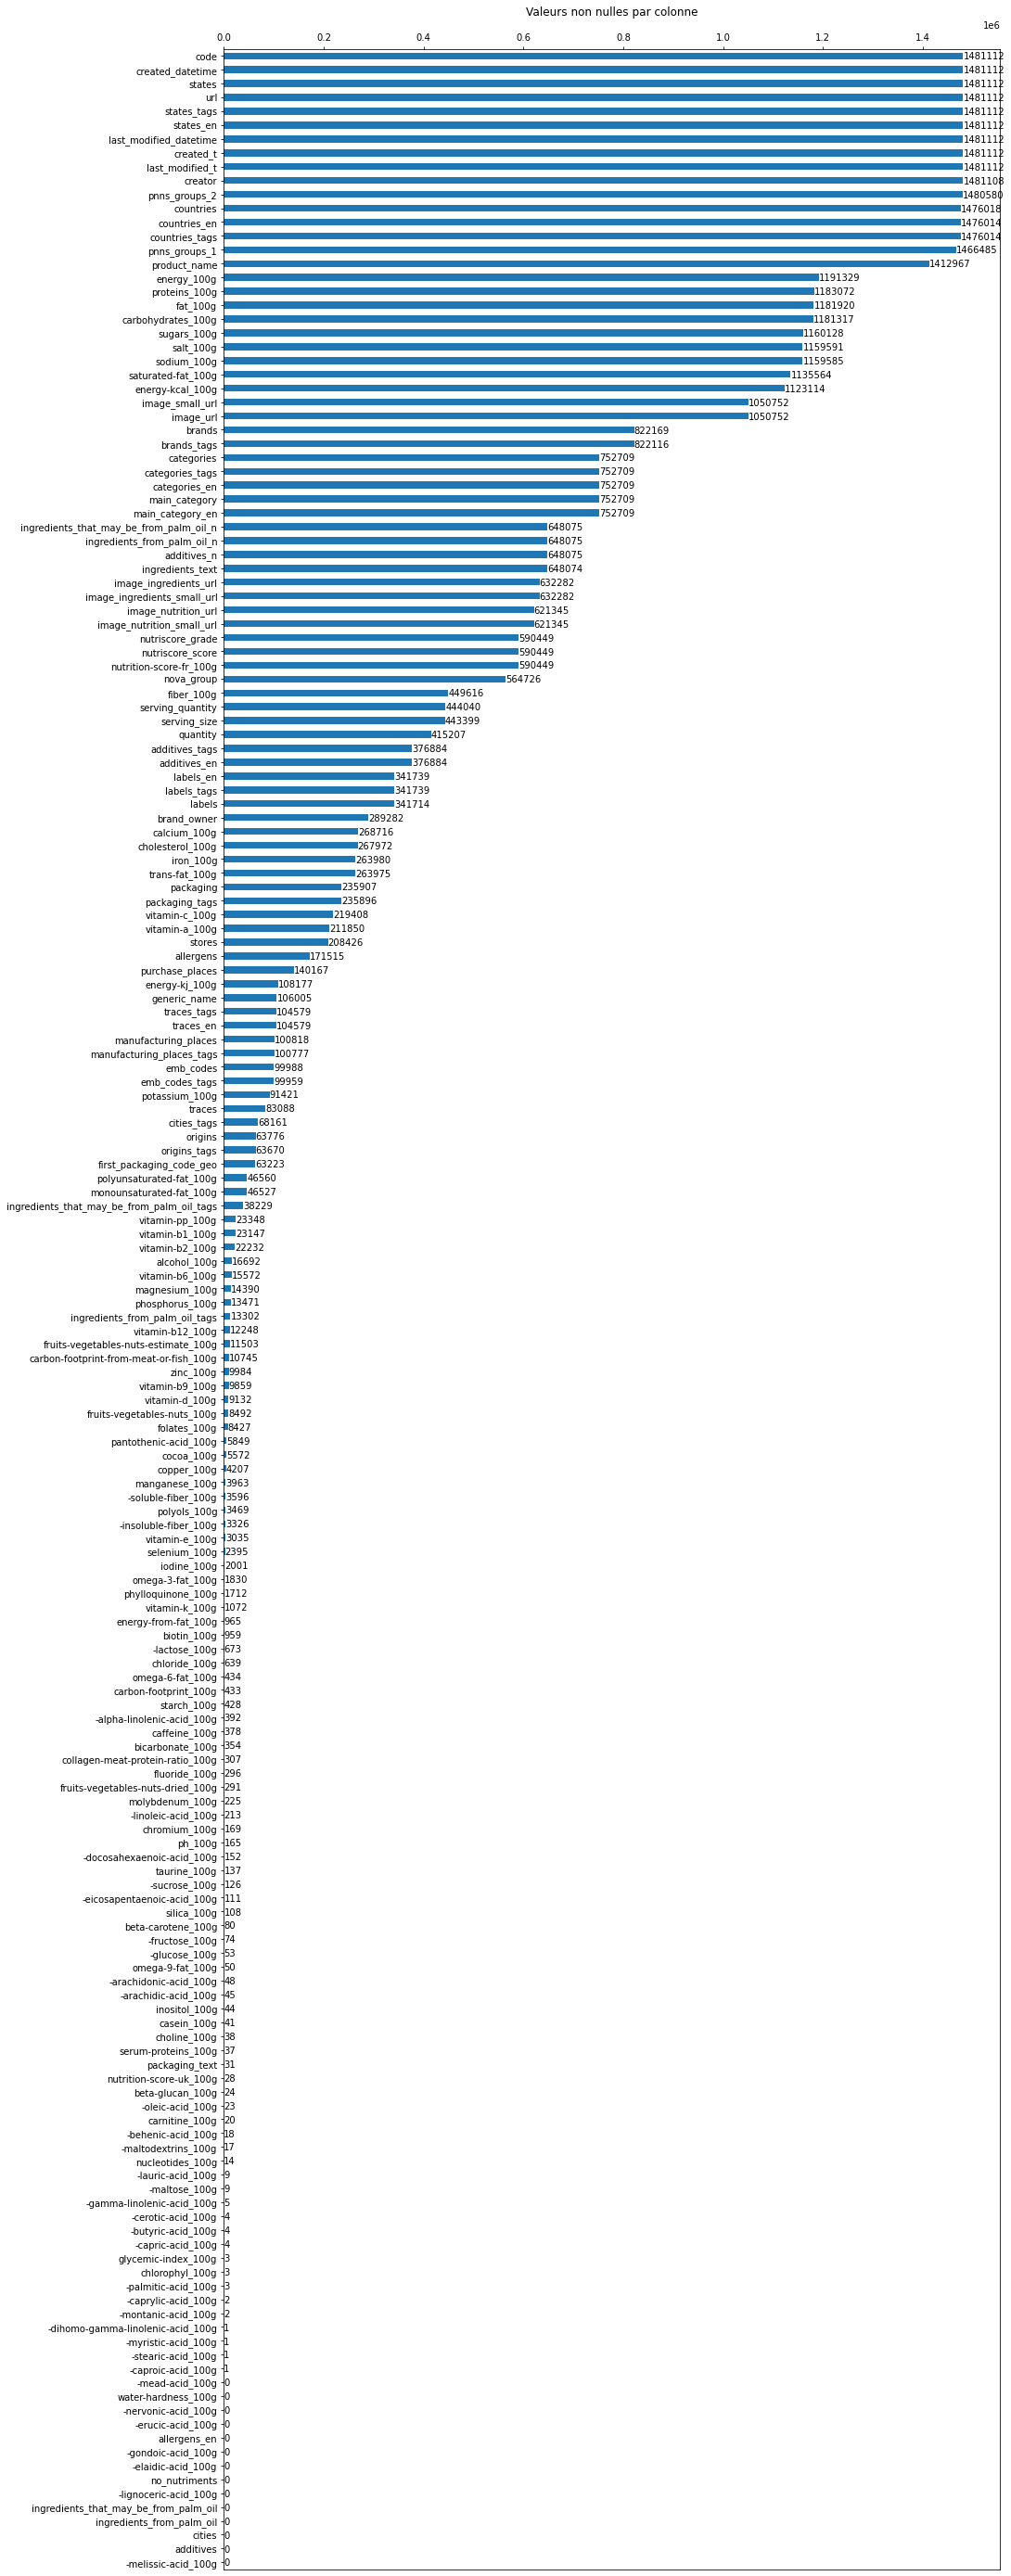

In [10]:
fig, ax = plt.subplots(figsize=(15,50))
colsFilled.plot.barh(ax=ax)
plt.gca().invert_yaxis()
ax.set_title('Valeurs non nulles par colonne')
ax.xaxis.tick_top()
for i, j in enumerate(colsFilled):
    ax.text(j,i+0.25,str(j))

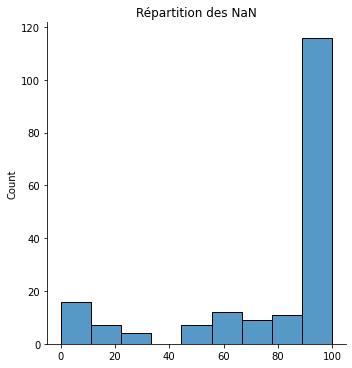

In [11]:
proportion_nan = data.isna().sum().divide(data.shape[0]/100).sort_values(ascending=False)
sns.displot(proportion_nan.values)
plt.title('Répartition des NaN')
plt.show()

Regroupement hiérarchique des données.

https://github.com/ResidentMario/missingno

>The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap. (...)
To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. (...)
Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity (...), then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.

<AxesSubplot:>

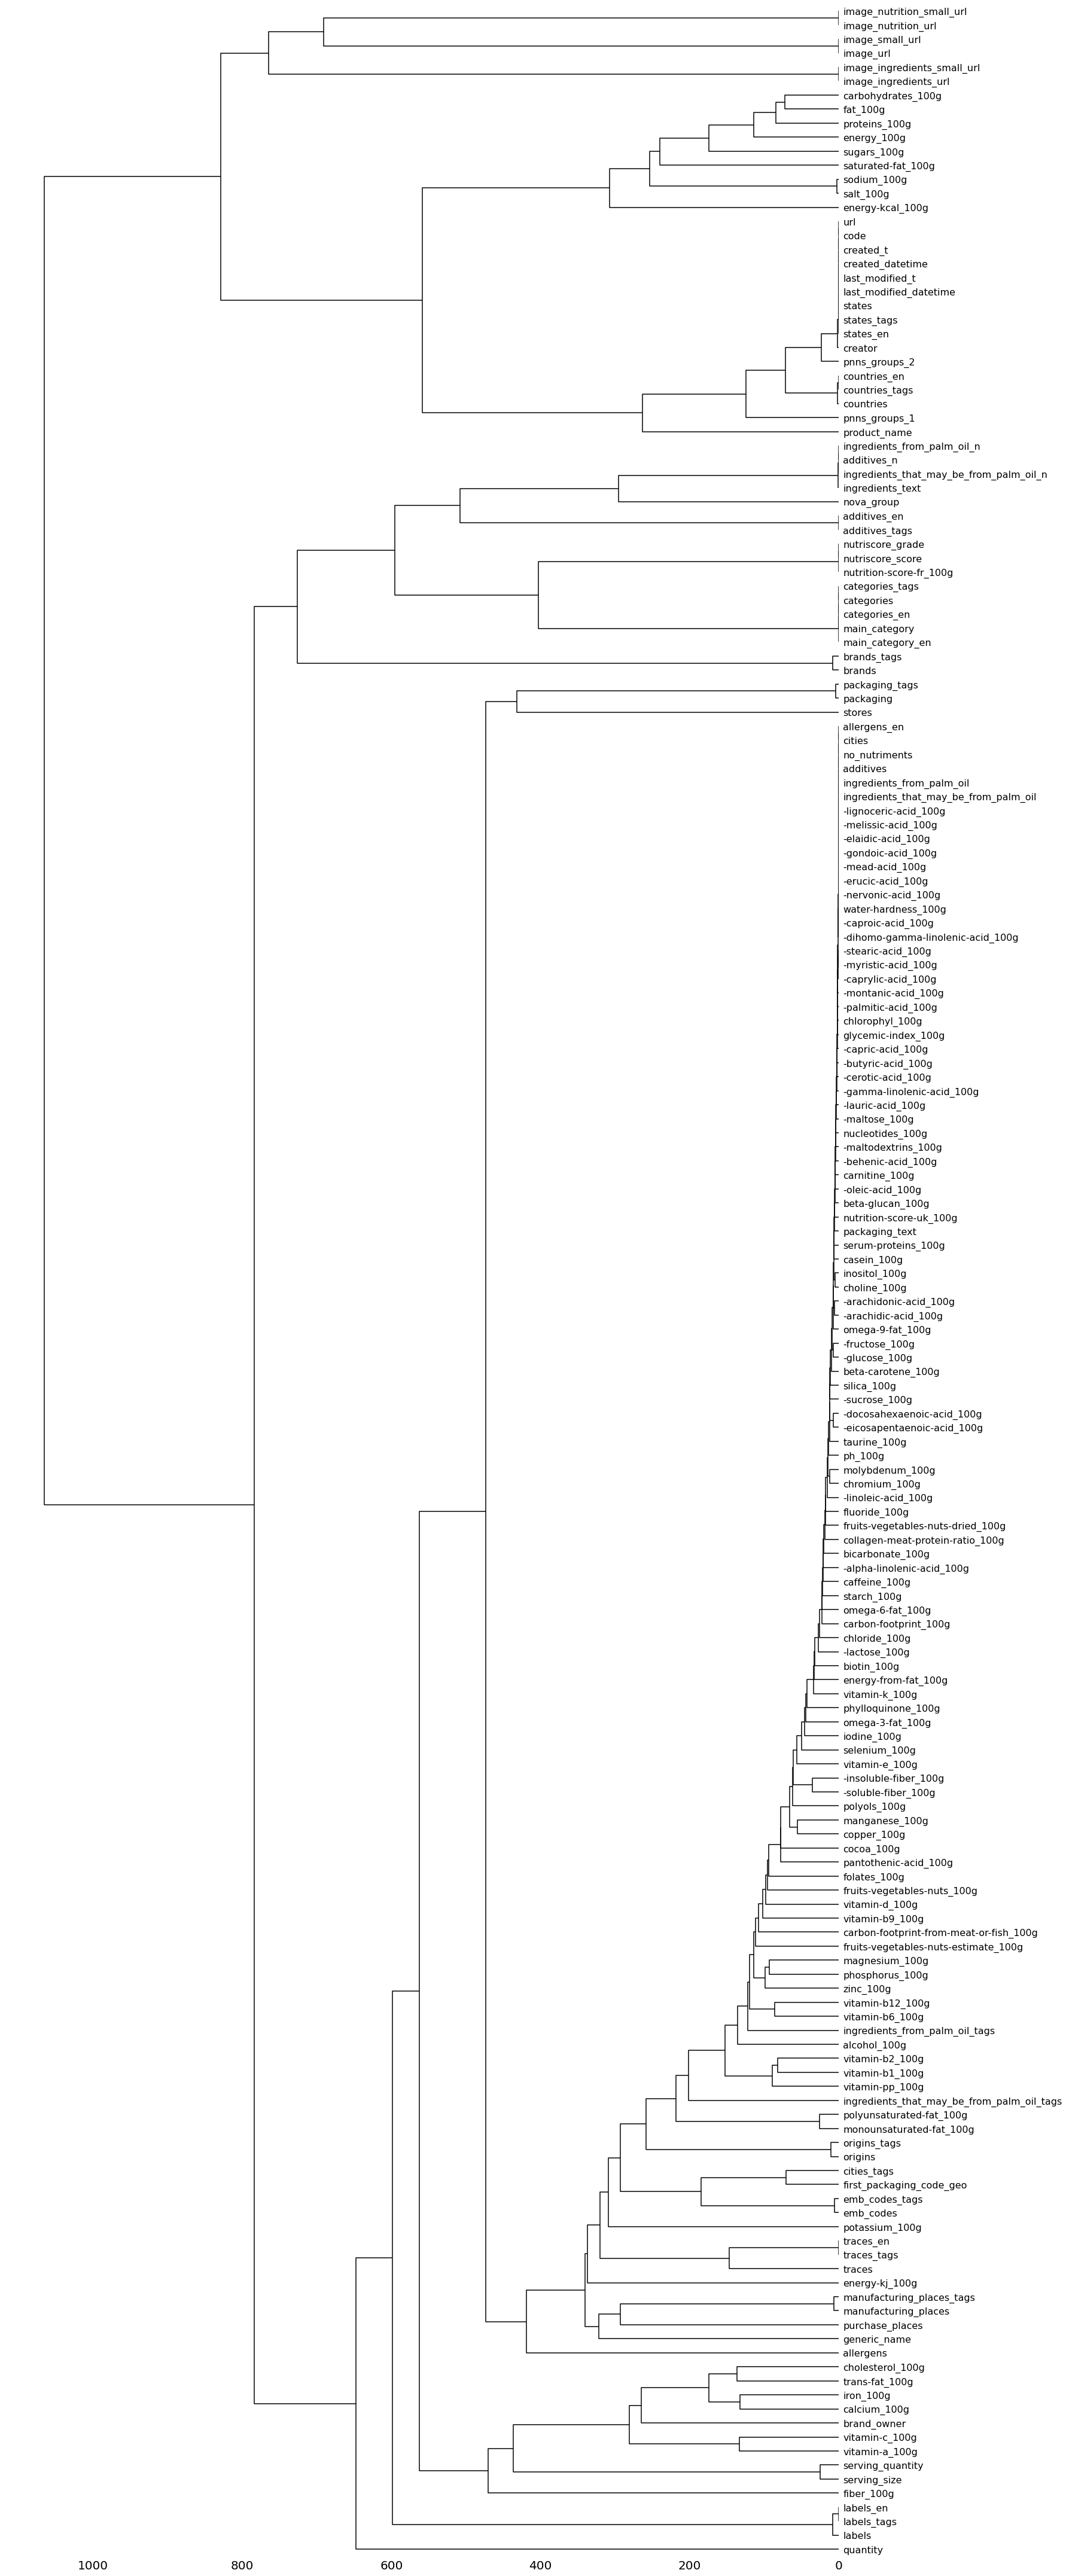

In [12]:
msno.dendrogram(data)

### Effacer les colonnes avec trop de NaN

Supprimer des colonnes en respectant une tolérance maximale au pourcentage de NaN (maxNan)

In [13]:
def delete_nan(df,maxNan):
    #np.nan
    df = df.replace(to_replace='^nan$',value=np.nan,regex=True)
    notdf = df.copy()
    notNanQ = (df.notna().sum())/df.shape[0]
    nCol = df.shape[1]
    df = df[notNanQ[notNanQ>maxNan].index.tolist()]
    notdf = notdf[notNanQ[notNanQ<maxNan].index.tolist()]
    nCol = nCol-df.shape[1]
    print('Colonnes supprimées :',nCol)
    print(notdf.columns.values.tolist())
    return df

In [14]:
df = delete_nan(data,0.1)

Colonnes supprimées : 116
['generic_name', 'packaging_text', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'no_nutriments', 'additives', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'energy-kj_100g', 'energy-from-fat_100g', '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g', '-capric-acid_100g', '-lauric-acid_100g', '-myristic-acid_100g', '-palmitic-acid_100g', '-stearic-acid_100g', '-arachidic-acid_100g', '-behenic-acid_100g', '-lignoceric-acid_100g', '-cerotic-acid_100g', '-montanic-acid_100g', '-melissic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', '-alpha-linolenic-acid_100g', '-eicosapentaenoic-acid_100g', '-docosahexaenoic-acid_100g

In [15]:
df.shape

(1481112, 66)

In [16]:
data.shape

(1481112, 182)

## Unifier timestamps
Unifier les formats de temps unix vers iso8601 yyyy-mm-ddThh:mn:ssZ

In [17]:
from datetime import datetime
import time

In [18]:
def unify_datetime(df):
    cols = df.columns
    colsViewed = []
    for col in cols:
        if col[-2:] == '_t': #_t dans la colonne ?
            newCol = col[:-2] #le nom du colonne sans _t
            df[newCol] = pd.to_datetime(df[col],unit='s')
            df = df.drop(col,axis=1)
    return df

In [19]:
df=unify_datetime(df)
df.shape

(1481112, 66)

### Doublons ?

In [20]:
temp = data.copy()
doublons = temp[temp.groupby('code')['code'].transform('size')>1].sort_values("code")
doublons.head(4)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
195823,75,http://world-en.openfoodfacts.org/product/0075,openfoodfacts-contributors,1586350894,2020-04-08T13:01:34Z,1586351006,2020-04-08T13:03:26Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:United Kingdom,en:united-kingdom,United Kingdom,"potato, high oleic sunflower oil (31%) flavour...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,en:e330,E330 - Citric acid,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4.0,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [21]:
del temp

On garde les "code" les plus remplies

In [22]:
def onlyOne(df):
    temp = df.copy()
    doublons = temp[temp.groupby('code')['code'].transform('size')>1].sort_values("code")
    codes = pd.unique(doublons['code'])
    indexs = doublons.index
    plusRemplie = []
    for code in codes:
        remplies = doublons[doublons['code']==code].count(axis=1)
        plusRemplie.append(remplies.idxmax) #Return index of first occurrence of maximum over requested axis
    moinsRemplie = doublons[~doublons.index.isin(plusRemplie)].index
    temp.drop(moinsRemplie,inplace=True)
    return temp

In [23]:
df = onlyOne(df)

In [24]:
df.shape

(1480520, 66)

## Tags

In [25]:
with np.printoptions(threshold=np.inf):
    print(data['states_tags'].unique().tolist())

['en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded', 'en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded', 'en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-

In [26]:
with np.printoptions(threshold=np.inf):
    print(data['countries_tags'].unique().tolist())

['en:france', 'en:spain', 'en:united-states', 'en:ireland', nan, 'en:belgium', 'en:united-kingdom', 'en:france,en:united-states', 'en:cote-d-ivoire', 'en:canada', 'en:switzerland', 'en:germany', 'en:peru', 'en:oman', 'en:slovenia', 'en:france,en:germany', 'en:france,en:germany,en:netherlands', 'en:kuwait', 'en:france,en:switzerland', 'en:italy', 'en:romania', 'en:australia', 'en:portugal', 'en:dominican-republic', 'en:reunion', 'en:israel', 'en:netherlands', 'en:saudi-arabia', 'en:luxembourg', 'en:mexico', 'en:rwanda', 'en:france,en:united-kingdom', 'en:belgium,en:france,en:netherlands,en:united-kingdom', 'en:guadeloupe', 'en:chile', 'en:greece', 'en:spain,en:switzerland', 'en:france,en:russia', 'en:france,en:india', 'en:austria,en:france,en:spain', 'en:senegal', 'en:united-kingdom,en:united-states', 'en:austria,en:france', 'en:germany,en:luxembourg,en:spain', 'en:lithuania', 'en:germany,en:spain', 'en:jersey', 'en:gibraltar', 'en:united-arab-emirates', 'en:canada,en:germany,en:italy,e

In [27]:
with np.printoptions(threshold=np.inf):
    print(data['countries_en'].unique().tolist())

['France', 'Spain', 'United States', 'Ireland', nan, 'Belgium', 'United Kingdom', 'France,United States', "Côte d'Ivoire", 'Canada', 'Switzerland', 'Germany', 'Peru', 'Oman', 'Slovenia', 'France,Germany', 'France,Germany,Netherlands', 'Kuwait', 'France,Switzerland', 'Italy', 'Romania', 'Australia', 'Portugal', 'Dominican Republic', 'Réunion', 'Israel', 'Netherlands', 'Saudi Arabia', 'Luxembourg', 'Mexico', 'Rwanda', 'France,United Kingdom', 'Belgium,France,Netherlands,United Kingdom', 'Guadeloupe', 'Chile', 'Greece', 'Spain,Switzerland', 'France,Russia', 'France,India', 'Austria,France,Spain', 'Senegal', 'United Kingdom,United States', 'Austria,France', 'Germany,Luxembourg,Spain', 'Lithuania', 'Germany,Spain', 'Jersey', 'Gibraltar', 'United Arab Emirates', 'Canada,Germany,Italy,United States,Argentina-espanol,Armenia-pyсский,Aruba-espanol,Asia-pacific,Australia-english,Austria-deutsch,Azerbaijan-русский,Belarus-pyсский,Belgium-francais,Belgium-nederlands,Bolivia-espanol,Bosnia-i-herceg

In [28]:
with np.printoptions(threshold=np.inf):
    print(data['countries'].unique().tolist())

['France', 'en:es', 'en:France', 'en:france', 'en:fr', 'United States', 'Irlande', 'en:FR', nan, 'en:be', 'United Kingdom', 'États-Unis, en:france', 'France, United States', 'France,États-Unis', 'Spain', 'en:Ivory Coast', 'Canada', 'España', 'Suisse', 'en:Germany', 'Belgium', 'France, États-Unis', 'Pérou', 'Schweiz', 'Oman', 'Deutschland', 'Slovenia', 'en:DE', 'Frankreich, Deutschland', 'France,Germany,Netherlands', 'en:KW', 'ફ્રાન્સ', 'en:spain', 'France,Switzerland', 'Frankreich, en:de', 'France, en:de', 'Italy', 'Romania', 'en:US', 'Australia', 'en:Italy', 'Portugal', 'en:Spain', 'en:us', 'en:Dominican Republic', 'en:RE', 'Espagne', 'Israel', 'en:CH', 'en:Netherlands', 'us', 'Royaume-Uni', 'en:United States', 'en:Saudi Arabia', 'en:gb', 'États-Unis', 'france', 'en:lu', 'België', 'en:Australia', 'en:United Kingdom', 'en:ch', 'en:de', 'México', 'en:Switzerland', 'Rwanda', 'Frankreich,Deutschland', 'France, United Kingdom', 'France, Royaume-Uni', 'France,United Kingdom', 'Belgique, Fra

Nous recherchons les strings les plus fréquentes pour identifier les manières de se référer à la France

In [29]:
import collections

In [30]:
temp = data.copy()
temp['countries']=temp['countries'].astype(str)
temp['countries_en']=temp['countries_en'].astype(str)
temp['countries_tags']=temp['countries_tags'].astype(str)
iC = [i.split(',',1)[0] for i in temp['countries'].tolist()]
iCE = [i.split(',',1)[0] for i in temp['countries_en'].tolist()]
iCT = [i.split(',',1)[0] for i in temp['countries_tags'].tolist()]
iCtot = collections.Counter(iC).most_common()+collections.Counter(iCE).most_common()+collections.Counter(iCT).most_common()
df_iCtot = pd.DataFrame(iCtot, columns = ["Country","Nombre d'ocurrences"]).sort_values(by="Nombre d'ocurrences",ascending=False)
with np.printoptions(threshold=np.inf):
    print(df_iCtot)

                                                Country  Nombre d'ocurrences
1561                                             France               703347
1860                                          en:france               703347
0                                                France               456415
1861                                   en:united-states               329148
1562                                      United States               329148
1                                         United States               310630
1563                                              Spain               167477
1862                                           en:spain               167477
2                                                 en:fr               125546
3                                                 en:es                87228
4                                             en:france                59288
1564                                            Belgium                52263

### Limiter les données à la France
Et convertir les DROM-COM et DOM-TOM ainsi que toutes les façon d'appeler la France dans d'autres langues en 'France'

In [31]:
def frenchIt(df):
    laFrance = ['France','france','en:france','en:fr','en:france','en:FR','en:France','Frankreich','Francia','New Caledonia',
               'en:new-caledonia','French Polynesia','en:french-polynesia','Frankrijk','en:guadeloupe','Guadeloupe',
               'en:martinique','Martinique','França','Francja','Polynésie française','Guadeloupe','La Réunion','en:RE',
                'fr','French Guiana','en:french-guiana','Nouvelle-Calédonie','en:mq','en:Réunion','New Caledonia',
                'Réunion','en:saint-pierre-and-miquelon','Saint Pierre and Miquelon','Franța','Frankrike','Guyane',
               'en:Martinique','en:French Polynesia','Franciaország','Saint-Pierre-et-Miquelon','en:GF','en:pm',
                'en:mayotte','Mayotte','Француска','Francie','法国','Francija','フランス','Fransa','Wallis and Futuna',
                'en:wallis-and-futuna','Francuska','ประเทศฝรั่งเศส','FRANCE','Saint Martin','en:saint-martin','fr:France',
                'fr:dom-tom','en:Saint Pierre and Miquelon','DOM TOM','Saint-Martin','en:frankreich','Polynésie Française',
                'en:Mayotte','fr:Frankrijk','프랑스','Франція','fr:francja','en:francia','en:francja','nl:Frankrijk',
                'Nueva Caledonia','en:WF','Guadalupe','Martinica','Frantzia','en:Wallis and Futuna','fr:Frankreich',
                'guadeloupe','Guiana Francesa','new-caledonia','fr:DOM TOM','Frakland','Franca','en:la-reunion','de:francja',
                'Francúzsko','Polinesia francese','en:france-la-reunion','法國','فرنسا','צרפת','فرانسه','ฝรั่งเศส','Франция']
    if 'nutrition-score-uk_100g' in df.columns:
        df = df.drop(['nutrition-score-uk_100g'],axis=1)
    df = df[df['countries'].isin(laFrance)]
    df = df.replace([laFrance],'France')
    return df

In [32]:
df=frenchIt(df)

In [33]:
df.shape

(652914, 66)

### Colonnes pouvant contenir les mêmes Tags

In [34]:
print(df.columns.values.tolist())

['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime', 'product_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'labels', 'labels_tags', 'labels_en', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'serving_size', 'serving_quantity', 'additives_n', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score', 'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en', 'brand_owner', 'main_category', 'main_category_en', 'image_url', 'image_small_url', 'image_ingredients_url', 'image_ingredients_small_url', 'image_nutrition_url', 'image_nutrition_small_url', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 

<AxesSubplot:>

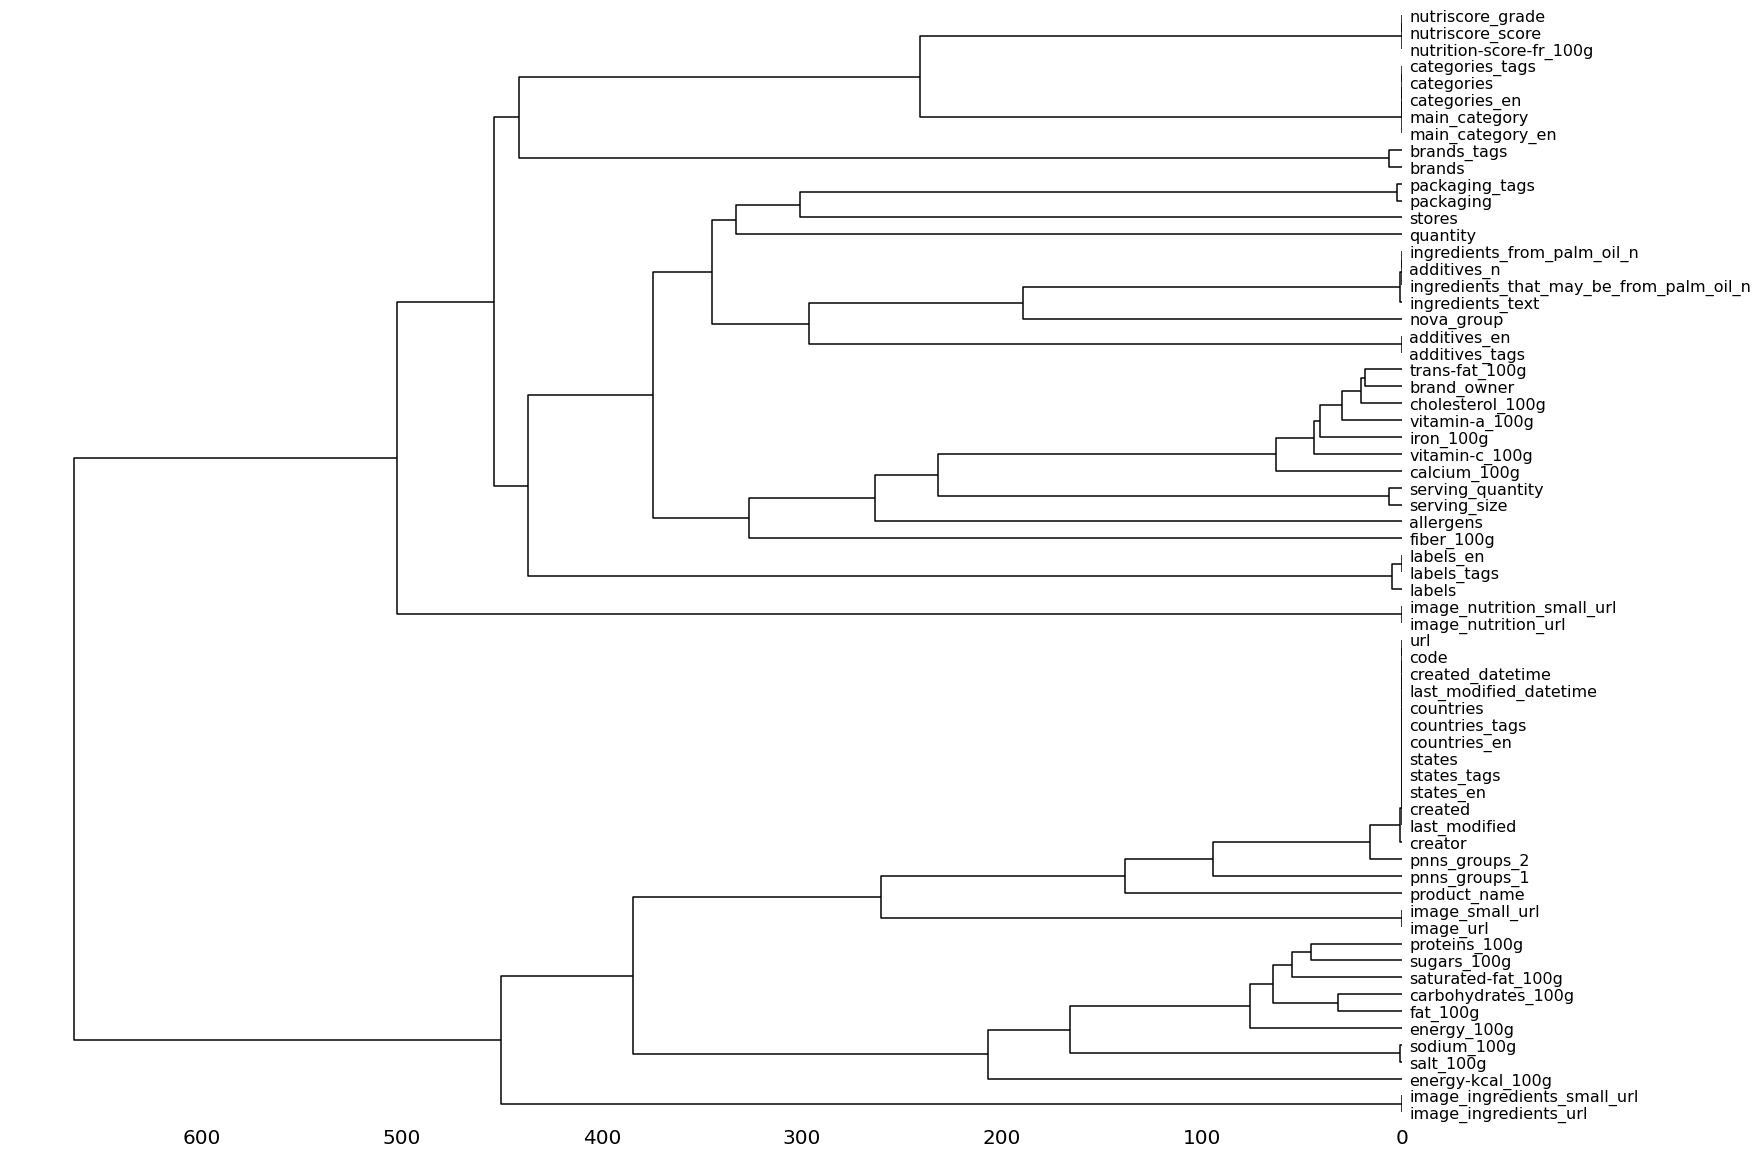

In [35]:
msno.dendrogram(df)

In [36]:
def memeTags(df, cols):
    temp = pd.DataFrame(columns=cols)
    for col in cols:
        temp = pd.concat((temp,df[~df[col].isna()][cols]))
    with pd.option_context('max_colwidth',0):
        display(temp.sample(5))

In [37]:
memeTags(df,['image_url','image_small_url'])

,image_url,image_small_url
797838,https://static.openfoodfacts.org/images/products/356/349/001/2108/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/356/349/001/2108/front_fr.4.200.jpg
465839,https://static.openfoodfacts.org/images/products/20954505/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/20954505/front_fr.4.200.jpg
903276,https://static.openfoodfacts.org/images/products/376/025/340/0350/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/376/025/340/0350/front_fr.4.200.jpg
758669,https://static.openfoodfacts.org/images/products/345/630/000/3932/front_fr.6.400.jpg,https://static.openfoodfacts.org/images/products/345/630/000/3932/front_fr.6.200.jpg
1286437,https://static.openfoodfacts.org/images/products/841/066/002/6951/front_fr.9.400.jpg,https://static.openfoodfacts.org/images/products/841/066/002/6951/front_fr.9.200.jpg


In [38]:
memeTags(df,['image_ingredients_url','image_ingredients_small_url'])

,image_ingredients_url,image_ingredients_small_url
595162,https://static.openfoodfacts.org/images/products/317/328/769/2163/ingredients_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/317/328/769/2163/ingredients_fr.4.200.jpg
823718,https://static.openfoodfacts.org/images/products/359/974/100/0426/ingredients_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/359/974/100/0426/ingredients_fr.4.200.jpg
1245151,https://static.openfoodfacts.org/images/products/800/738/000/0318/ingredients_en.10.400.jpg,https://static.openfoodfacts.org/images/products/800/738/000/0318/ingredients_en.10.200.jpg
808196,https://static.openfoodfacts.org/images/products/357/588/300/3242/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/357/588/300/3242/ingredients_fr.7.200.jpg
757636,https://static.openfoodfacts.org/images/products/345/201/000/2579/ingredients_fr.10.400.jpg,https://static.openfoodfacts.org/images/products/345/201/000/2579/ingredients_fr.10.200.jpg


In [39]:
memeTags(df,['image_nutrition_url','image_nutrition_small_url'])

,image_nutrition_url,image_nutrition_small_url
637351,https://static.openfoodfacts.org/images/products/325/622/021/0850/nutrition_fr.52.400.jpg,https://static.openfoodfacts.org/images/products/325/622/021/0850/nutrition_fr.52.200.jpg
767168,https://static.openfoodfacts.org/images/products/348/319/009/1671/nutrition_fr.5.400.jpg,https://static.openfoodfacts.org/images/products/348/319/009/1671/nutrition_fr.5.200.jpg
699276,https://static.openfoodfacts.org/images/products/330/865/038/8804/nutrition_fr.10.400.jpg,https://static.openfoodfacts.org/images/products/330/865/038/8804/nutrition_fr.10.200.jpg
762135,https://static.openfoodfacts.org/images/products/346/625/002/0002/nutrition_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/346/625/002/0002/nutrition_fr.4.200.jpg
794210,https://static.openfoodfacts.org/images/products/356/007/101/4414/nutrition_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/356/007/101/4414/nutrition_fr.7.200.jpg


#### Supprimer les colonnes avec "small_url" dans le nom

In [40]:
df = df.drop(['image_small_url','image_ingredients_small_url','image_nutrition_small_url'],axis=1)

In [41]:
memeTags(df,['categories','categories_en','categories_tags'])

,categories,categories_en,categories_tags
484662,"Viandes, Porc","Meats,Pork","en:meats,en:pork"
1139231,"Aliments et boissons à base de végétaux, Boissons, Boissons chaudes, Boissons à base de végétaux, Thés, Thés verts","Plant-based foods and beverages,Beverages,Hot beverages,Plant-based beverages,Teas,Green teas","en:plant-based-foods-and-beverages,en:beverages,en:hot-beverages,en:plant-based-beverages,en:teas,en:green-teas"
1257218,"Produits laitiers, Produits fermentés, Produits laitiers fermentés, Fromages, Fromages italiens, Ricotta","Dairies,Fermented foods,Fermented milk products,Cheeses,Italian cheeses,Ricotta","en:dairies,en:fermented-foods,en:fermented-milk-products,en:cheeses,en:italian-cheeses,en:ricotta"
627489,"Snacks, Snacks salés, Apéritif, Biscuits apéritifs","Snacks,Salty snacks,Appetizers,Crackers","en:snacks,en:salty-snacks,en:appetizers,en:crackers"
487846,"Plats préparés, Produits à la viande, Plats préparés à la viande, Plats à la volaille, Plats au canard, Rôtis, Rôtis de canard","Meals,Meat-based products,Meals with meat,Poultry meals,Duck dishes,fr:rotis,fr:rotis-de-canard","en:meals,en:meat-based-products,en:meals-with-meat,en:poultry-meals,en:duck-dishes,fr:rotis,fr:rotis-de-canard"


In [42]:
memeTags(df,['ingredients_text','allergens'])

,ingredients_text,allergens
636933,"Viande de dinde reconstituée saumurée (viande de dinde (43,5%), eau, liant protéique de _soja_, sel, dextrose de blé, arômes (_soja_), antioxydant : E316). Jambon de dinde reconstitué cuit (viande de dinde (8%),eau, liant protéique de _soja_, sel nitrité (E250), sel, dextrose de blé, arômes (_soja_), antioxydant : E316). _Fromage_ fondu (contient de l'_oeuf_) (_Fromages_, eau, _beurre_, amidons modifiés, _lait_ écrémé en poudre, _lactosérum_, sels émulsifiants E331, sel, gélifiant E407), farine de _blé_, eau, sel, levure, épices.","en:eggs,en:gluten,en:milk,en:soybeans"
241543,"LAIT, SEL, PRÉSURE, CONSERVATEUR : LYSOZYME DIŒUF. Avertissement Allergènes : Voir ingrédients en GRAS.",en:milk
629147,"Jambon de porc, gras et couenne de porc, sel, dextrose, conservateurs : ascorbate de sodium, nitrite de sodium.",NaN
638940,"Galette de blé noir 50 % (eau, farine de blé noir 24 %, sel de Guérande 0,85 %), _emmental_ (France) 14 %, _crème_ (France) 14 % (stabilisant : carraghénanes), œufs brouillés 13,3 % (_œufs_ France), blanc d’_œufs_ (France), _lait_ écrémé reconstitué, amidon transformé de maïs, _lactose_ et protéines de _lait_, sel, acidifiant : acide citrique, épaississant : gomme xanthane), jambon supérieur 8,7 % (jambon de porc VPF (France), eau, sel, dextrose, sirop de glucose, arômes, antioxydant : érythorbate de sodium, conservateur : nitrite de sodium).","en:eggs,en:milk"
590465,Contient du malt d'_orge_ et du malt de _froment_ (_blé_),en:gluten


In [43]:
memeTags(df,['states', 'states_tags','states_en'])

,states,states_tags,states_en
276271,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories to be completed,Brands to be completed,Packaging to be completed,Quantity to be completed,Product name completed,Photos to be validated,Photos uploaded"
1087624,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories completed,Brands to be completed,Packaging to be completed,Quantity to be completed,Product name completed,Photos to be validated,Photos uploaded"
247388,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories to be completed,Brands to be completed,Packaging to be completed,Quantity to be completed,Product name completed,Photos to be validated,Photos uploaded"
559563,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-

In [44]:
memeTags(df,['main_category','main_category_en','pnns_groups_1', 'pnns_groups_2'])

,main_category,main_category_en,pnns_groups_1,pnns_groups_2
828153,en:meals,Meals,Composite foods,One-dish meals
515109,en:duck-legs,Duck legs,Fish Meat Eggs,Meat
714830,en:puffed-spelt-cakes,Puffed spelt cakes,Cereals and potatoes,Cereals
695433,en:fruit-jams,Fruit-jams,Sugary snacks,Sweets
606772,en:salted-peanuts,Salted peanuts,Salty snacks,Nuts


In [45]:
memeTags(df,['labels', 'labels_tags', 'labels_en',])

,labels,labels_tags,labels_en
888491,"No preservatives, en:no-colorings","en:no-colorings,en:no-preservatives","No colorings,No preservatives"
678758,en:organic,en:organic,Organic
47478,en:no-artificial-flavors,en:no-artificial-flavors,No artificial flavors
778447,en:ab-agriculture-biologique,"en:organic,en:eu-organic,en:ab-agriculture-biologique","Organic,EU Organic,AB Agriculture Biologique"
458137,"Agriculture durable, UTZ Certified, Point Vert, Certifié UTZ","en:sustainable-farming,en:utz-certified,en:green-dot,en:utz-certified-cacao","Sustainable farming,UTZ Certified,Green Dot,UTZ Certified Cacao"


In [46]:
memeTags(df,['additives_n','additives_tags','additives_en'])

,additives_n,additives_tags,additives_en
799455,5.0,"en:e202,en:e250,en:e316,en:e407,en:e451","E202 - Potassium sorbate,E250 - Sodium nitrite,E316 - Sodium erythorbate,E407 - Carrageenan,E451 - Triphosphates"
459673,3.0,"en:e160b,en:e161b,en:e322,en:e322i","E160b - Annatto,E161b - Lutein,E322 - Lecithins,E322i - Lecithin"
837014,0.0,NaN,NaN
926500,2.0,"en:e290,en:e330","E290 - Carbon dioxide,E330 - Citric acid"
798390,0.0,NaN,NaN


In [47]:
memeTags(df,['packaging', 'packaging_tags'])

,packaging,packaging_tags
1430370,brique en carton,brique-en-carton
557851,Frais,frais
585432,Conserve,conserve
567695,"Brique,Carton","brique,carton"
620024,"Frais,Plastique,barquette","frais,plastique,barquette"


In [48]:
memeTags(df,['brands', 'brands_tags'])

,brands,brands_tags
839213,Brocéliande,broceliande
1088529,Leffe,leffe
942294,Costa,costa
882285,Biocoop,biocoop
599346,Vahiné,vahine


In [49]:
memeTags(df,['stores','brand_owner'])

,stores,brand_owner
692133,Thiriet,NaN
605155,Cora,NaN
717686,Monoprix,NaN
425867,Liddl,NaN
603951,"Simply Market, Magasins U",NaN


In [50]:
memeTags(df,['nutriscore_score','nutriscore_grade','nutrition-score-fr_100g','nova_group'])

,nutriscore_score,nutriscore_grade,nutrition-score-fr_100g,nova_group
716908,3.0,c,3.0,NaN
572982,10.0,c,10.0,3.0
643886,14.0,d,14.0,4.0
754100,21.0,e,21.0,NaN
1428925,12.0,d,12.0,4.0


In [51]:
memeTags(df,['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n'])

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
1102545,1.0,1.0
1085880,0.0,1.0
945780,0.0,0.0
559129,0.0,0.0
824814,0.0,0.0


In [52]:
memeTags(df,['serving_size', 'serving_quantity','quantity'])

,serving_size,serving_quantity,quantity
1205224,"6,8 g",6.8,320 g
662304,NaN,NaN,400g
257588,64g,64.0,515 g (8 viennoiseries)
627991,25 g,25.0,150 g
1108225,NaN,NaN,30 ml


In [53]:
memeTags(df,['energy-kcal_100g', 'energy_100g'])

,energy-kcal_100g,energy_100g
806687,0.0,0.0
965231,215.0,900.0
759279,212.0,887.0
744431,384.0,1607.0
593413,368.0,1540.0


In [54]:
memeTags(df,['fat_100g','saturated-fat_100g','trans-fat_100g','cholesterol_100g'])

,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g
877426,0.03,0.01,NaN,NaN
292286,0.10,0.10,NaN,NaN
721554,0.00,0.00,NaN,NaN
314340,5.70,1.20,NaN,NaN
1259594,24.00,5.00,NaN,NaN


In [55]:
memeTags(df,['salt_100g', 'sodium_100g'])

,salt_100g,sodium_100g
765822,0.09,0.036
642254,0.02,0.008
1246795,10.00,4.000
695275,0.76,0.304
1305638,1.57,0.628


In [56]:
memeTags(df,['carbohydrates_100g','sugars_100g','fiber_100g'])

,carbohydrates_100g,sugars_100g,fiber_100g
880242,36.0,30.000000,NaN
630740,19.0,17.000000,NaN
636950,0.5,0.500000,NaN
638438,57.5,16.200001,0.4
792161,1.4,1.400000,0.7


In [57]:
memeTags(df,['calcium_100g','iron_100g'])

,calcium_100g,iron_100g
687912,0.520,0.0087
316283,12.000,NaN
567202,0.274,NaN
963356,NaN,0.0080
576217,0.153,NaN


In [58]:
memeTags(df,['proteins_100g'])

,proteins_100g
771119,7.3
898622,11.6
686759,7.0
772988,8.0
1258376,0.8


In [59]:
memeTags(df,['vitamin-a_100g','vitamin-c_100g'])

,vitamin-a_100g,vitamin-c_100g
1187531,0.0003,0.070
1041600,NaN,0.013
153690,0.0000,0.000
639196,NaN,0.060
1087819,NaN,0.021


#### Verifier Tags avec states_tags

In [60]:
temp = data.copy()

states_tags = {}
for i in temp.index:
    tags = str(temp.at[i,'states_tags']).split(",")
    for tag in tags:
        if tag in states_tags:
            states_tags[tag]+=1
        else:
            states_tags[tag]=1
df_states_tags = pd.DataFrame(states_tags.items(),columns = ["states_tags","Nombre d'ocurrences"]).sort_values(by="Nombre d'ocurrences",ascending=False)
df_states_tags['states_tags'] = df_states_tags['states_tags'].str.replace('en:','')
with np.printoptions(threshold=np.inf):
    print(df_states_tags)

                        states_tags  Nombre d'ocurrences
10           product-name-completed              1412967
4    packaging-code-to-be-completed              1381118
0                   to-be-completed              1336738
3   expiration-date-to-be-completed              1327151
5   characteristics-to-be-completed              1282128
1         nutrition-facts-completed              1254126
8         packaging-to-be-completed              1245203
12                  photos-uploaded              1141690
9          quantity-to-be-completed              1065879
11           photos-to-be-validated               843434
2       ingredients-to-be-completed               838381
18                 brands-completed               822191
17             categories-completed               752717
6        categories-to-be-completed               728394
7            brands-to-be-completed               658920
15            ingredients-completed               642731
14               quantity-compl

Supprimer des lignes sans informations intéressantes ("empty" ou "to be completed")

In [61]:
import re

def notEmpty(df):
    df.dropna(subset=['states_tags'], inplace=True)
    df = df[~df['states_tags'].str.contains("empty|to-be-completed")]
    return df

In [62]:
df = notEmpty(df)
df.shape

(18967, 63)

#### Salt & Sodium

Relation entre le sel et le sodium?

In [63]:
import statsmodels.api as sm #https://www.statsmodels.org/stable/index.html

In [64]:
y = df.dropna(subset=['salt_100g','sodium_100g'])['salt_100g'] #Variable expliquée
X = df.dropna(subset=['salt_100g','sodium_100g'])['sodium_100g'] #Variable explicative
X2 = sm.add_constant(X)
lReg = sm.OLS(y,X2).fit()
print(lReg.summary())

                            OLS Regression Results                            
Dep. Variable:              salt_100g   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                 9.666e+04
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:35:54   Log-Likelihood:                -22322.
No. Observations:               17402   AIC:                         4.465e+04
Df Residuals:                   17400   BIC:                         4.466e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1737      0.007     23.544      

Le *coefficient* à 2.12 signifie que -en maintenant les autres régresseurs constants- pour chaque point d'augmentation du sel, le sodium augmente 212%.

*L'erreur standard* est l'écart type de chaque variable de régression du modèle. Le sel se situe dans l'intervalle de confiance de 95%.

En ce qui concerne le *t-statistic*, nous détaillons qu'elle détermine si une variable indépendante est pertinente ou non dans le modèle de régression. Comme il ressort de la théorie économétrique, les valeurs absolues supérieures à 2 impliquent que le régresseur se trouve dans l'intervalle de confiance à 95%.

La *p-value* de chaque variable indépendante vérifie si l'hypothèse nulle du coefficient est égale à zéro, ce qui signifie qu'un *p-value* < 0.05 implique que la variable de régression est hautement significative dans le modèle, compte tenu des variations qu'elle génère dans le régresseur, et donc l'hypothèse nulle est rejetée. On rappelle que, dans cette étude, le sodium est significatif puisqu'il a un *p-value* égale à 0.

Dans le cas éventuel d'une *p-value* > 0.05, la variable régressive n'est pas statistiquement significative et l'hypothèse nulle doit être acceptée. Cet indicateur est utilisé pour identifier les termes à conserver dans le modèle et ceux à supprimer.

Sur la base de *R-squared*, nous détaillons que les régressions linéaires calculent une équation qui minimise la distance entre la ligne ajustée représentant l'équation du modèle. Le *R-squared* est la mesure de l'exactitude de la partie systémique du modèle, en prenant des valeurs de 0 à 1 et plus sa valeur est proche de 1, plus l'explication du modèle est exacte.

Dans le cas de cette analyse, le *R-squared* est proche 1, ce qui signifie que le sodium explique le comportement du sel.

In [65]:
def salt_sodium(df):
    y = df.dropna(subset=['salt_100g','sodium_100g'])['salt_100g'] #Variable expliquée
    X = df.dropna(subset=['salt_100g','sodium_100g'])['sodium_100g'] #Variable explicative
    X2 = sm.add_constant(X)
    lReg = sm.OLS(y,X2).fit()
    coefDep = lReg.params[0]
    coefDepSalt = lReg.params[1] #Le coefficient comme variable
        
    indexSel = df[df['salt_100g'].isna()].index
    df.loc[indexSel,'salt_100g'] = coefDep + df.loc[indexSel,'sodium_100g']*coefDepSalt #coef Dep. variable salt_100g
    return df

In [66]:
df = salt_sodium(df)

#### Fats & Cholesterol

Les gras trans et les gras saturés augmentent le cholestérol total. Source : https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/in-depth/trans-fat/art-20046114#:~:text=Trans%20fat%20is%20considered%20the,the%20leading%20killer%20of%20adults.

Graisses saturées maximum possibles : https://tools.myfooddata.com/nutrient-ranking-tool/Saturated-Fatty-Acids/All/Highest/100g/Common-Branded/No 

| # | Branded (100g serving) | Common (100g serving) |
| --- | :--- | :--- |
| 1 | Terra Delyssa Organic Extra Virgin Olive Oil: 1780g | Coconut Oil: 82.5g |
| 2 | St Jalaica Legend Coconut Oil: 100g | Palm Kernel Oil: 81.5g |
| 3 | Bast O Butter Ultimate Theatre Style Butter: 97g | Ghee (clarified butter): 61.9g |


Catégories selon la quantité de graisse : https://www.heartuk.org.uk/low-cholesterol-foods/saturated-fat


| Per 100g food | Low | Medium | High |
| :--- | :--- | :--- | :--- |
| Fat | 3g or less | 3 - 17.5g | 17.5g or more |
| Saturates | 1.5g or less | 1.5 - 5g | 5g or more |
| Sugars | 5g or less | 5 - 22.5g | 22.5g or more |
| Salt | 0.3g or less | 0.3 - 1.5g | 1.5g or more |

Plus de 17.5g sont considérés comme riches en graisses et peu de produits en contiennent plus de 60g (principalement des huiles).

In [67]:
df[['fat_100g','saturated-fat_100g','trans-fat_100g','cholesterol_100g']].describe()

,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g
count,17687.000000,17424.000000,66.000000,37.000000
mean,13.965768,6.218633,0.310000,0.023994
std,15.311211,8.481537,0.953918,0.042002
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.900000,0.032500,0.000000
50%,8.900000,2.700000,0.100000,0.000000
75%,21.000000,8.700000,0.200000,0.046000
max,100.000000,100.000000,7.600000,0.167500


<AxesSubplot:>

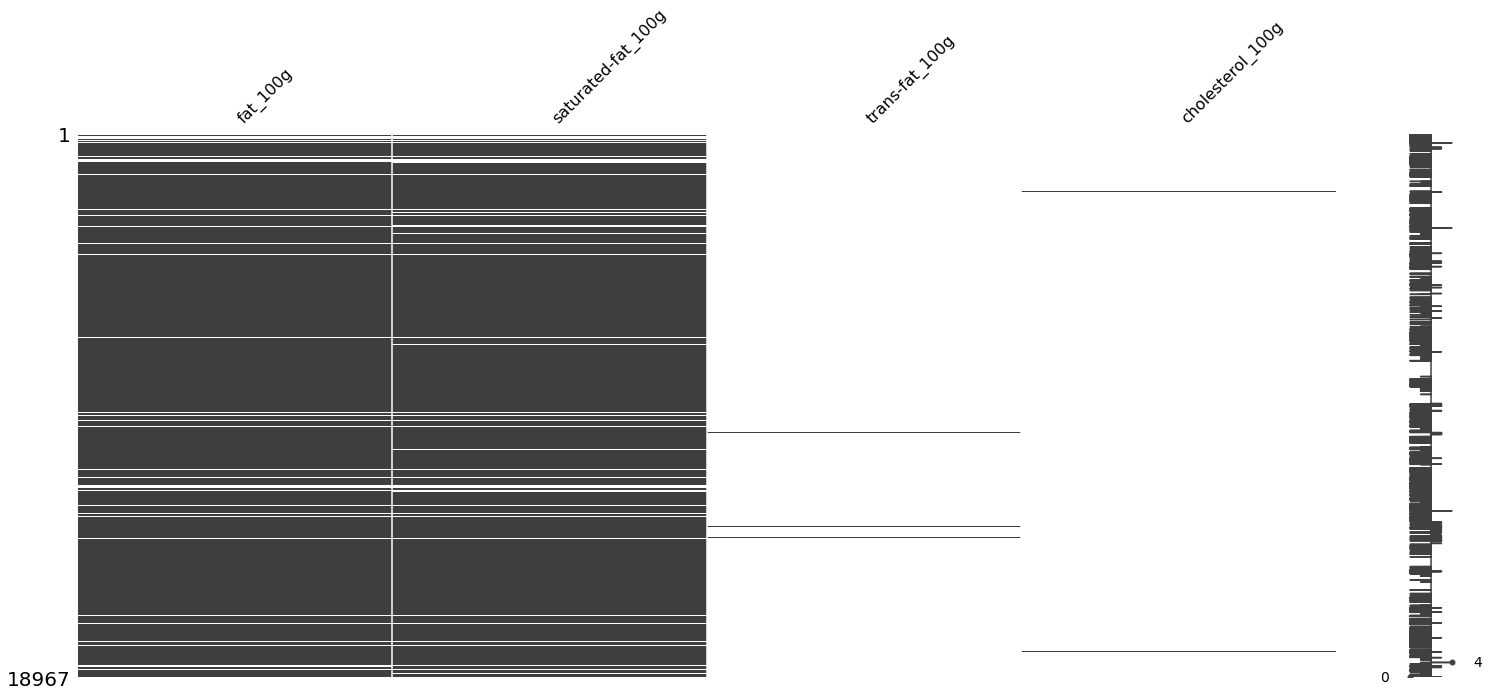

In [68]:
msno.matrix(df[['fat_100g','saturated-fat_100g','trans-fat_100g','cholesterol_100g']])

In [69]:
X = df.dropna(subset=['fat_100g','saturated-fat_100g','cholesterol_100g'])[['fat_100g','saturated-fat_100g']] #Variable explicative 
y = df.dropna(subset=['fat_100g','saturated-fat_100g','cholesterol_100g'])['cholesterol_100g'] #Variable expliquée
X2 = sm.add_constant(X)
lReg = sm.OLS(y,X2).fit()
print(lReg.summary())

                            OLS Regression Results                            
Dep. Variable:       cholesterol_100g   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     4.059
Date:                Sun, 06 Dec 2020   Prob (F-statistic):             0.0265
Time:                        18:35:55   Log-Likelihood:                 74.295
No. Observations:                  36   AIC:                            -142.6
Df Residuals:                      33   BIC:                            -137.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0121      0

In [70]:
X = df.dropna(subset=['saturated-fat_100g','cholesterol_100g'])['saturated-fat_100g'] #Variable explicative 
y = df.dropna(subset=['saturated-fat_100g','cholesterol_100g'])['cholesterol_100g'] #Variable expliquée
X2 = sm.add_constant(X)
lReg = sm.OLS(y,X2).fit()
print(lReg.summary())

                            OLS Regression Results                            
Dep. Variable:       cholesterol_100g   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     5.063
Date:                Sun, 06 Dec 2020   Prob (F-statistic):             0.0310
Time:                        18:35:55   Log-Likelihood:                 72.834
No. Observations:                  36   AIC:                            -141.7
Df Residuals:                      34   BIC:                            -138.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0095      0

Dans le cas de cette analyse, le *R-squared* est de 0.130, ce qui signifie que *saturated-fat_100g* explique le 13% du comportement du *cholesterol_100g* donc nous ne pouvons pas utiliser le premier pour remplir les NAN du dernier.

#### Sugars

Le maximum possible sont les bonbons avec 99g pour 100g.

<AxesSubplot:>

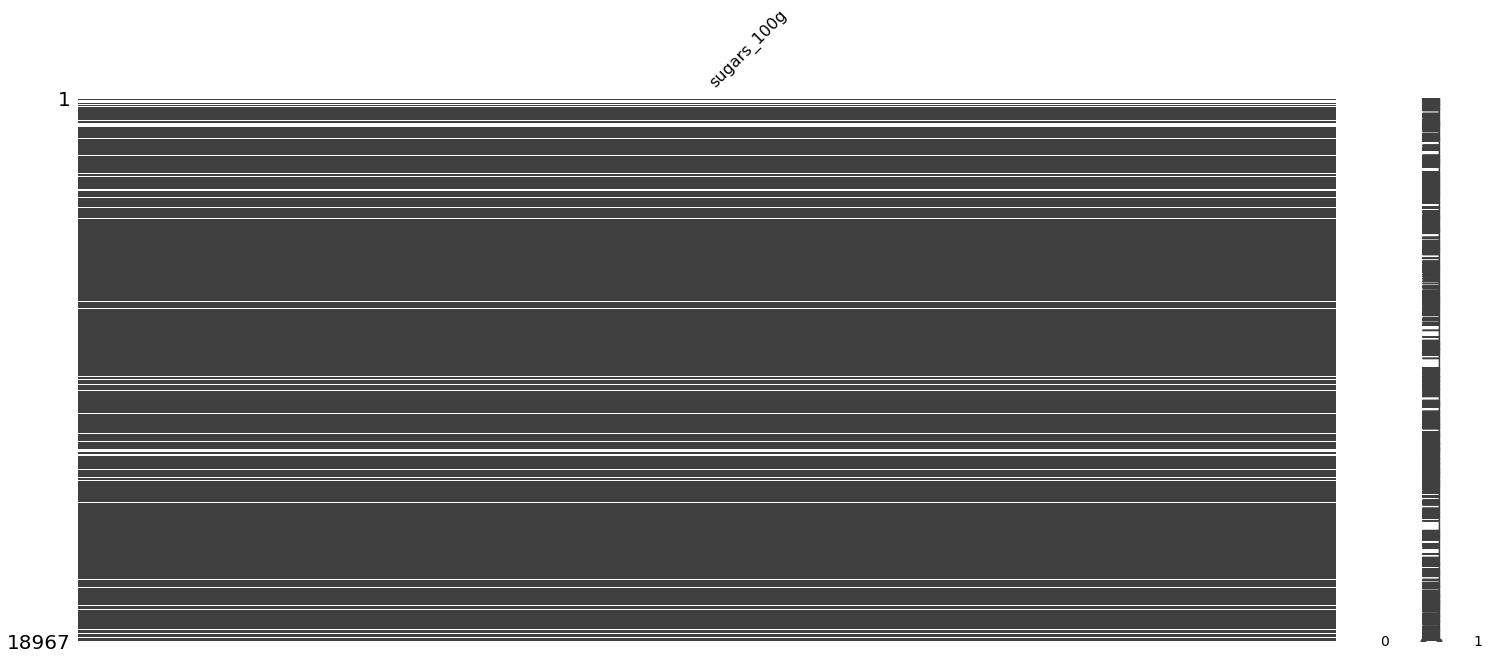

In [71]:
msno.matrix(df[['sugars_100g']])

In [72]:
df[['sugars_100g']].describe()

,sugars_100g
count,17404.000000
mean,6.930804
std,12.810573
min,0.000000
25%,0.500000
50%,1.800000
75%,5.800000
max,100.000000


#### Energy

Wikipedia :

> Recommendations in the United States are 10,900 and 8,400 kJ (2,600 and 2,000 kcal) for men and women (respectively) between 31 and 35, at a physical activity level equivalent to walking about 2 to 5 km (1 1⁄2 to 3 mi) per day at 5 to 6 km/h (3 to 4 mph) in addition to the light physical activity associated with typical day-to-day life. French guidance suggests roughly the same levels.

Sources :

https://en.wikipedia.org/wiki/Food_energy

https://www.nhs.uk/live-well/eat-well/how-to-read-food-labels/

https://www.eatforhealth.gov.au/sites/default/files/files/eatingwell/efh_food_label_example_130621.pdf

https://tools.myfooddata.com/nutrient-ranking-tool/Calories/All/Highest/100g/Common/No

https://www.consumerreports.org/consumerist/here-are-this-years-8-most-ridiculously-calorie-filled-chain-restaurant-meals/

<AxesSubplot:>

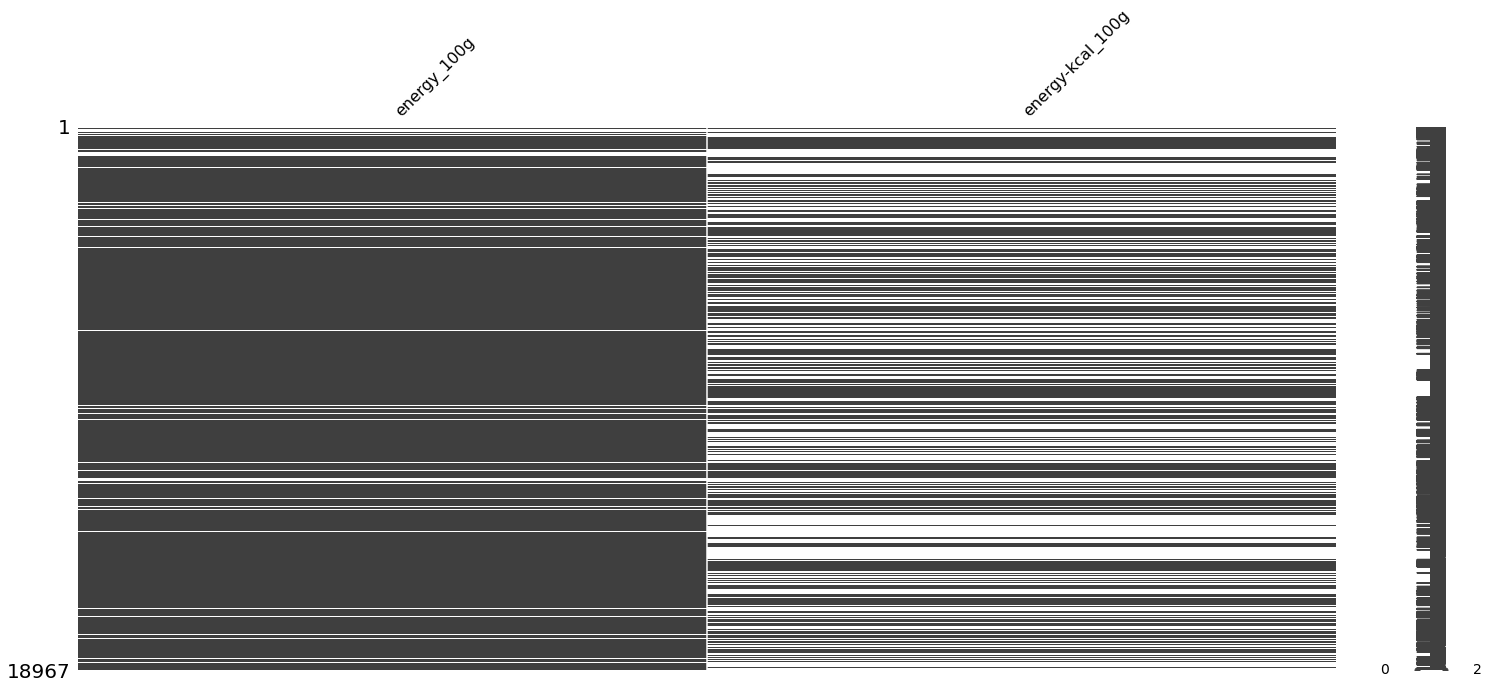

In [73]:
msno.matrix(df[['energy_100g','energy-kcal_100g']])

In [74]:
df[['energy_100g','energy-kcal_100g']].describe()

,energy_100g,energy-kcal_100g
count,17627.000000,10141.000000
mean,964.056274,236.460907
std,642.707214,158.190659
min,0.000000,0.000000
25%,473.000000,114.000000
50%,830.000000,208.000000
75%,1339.000000,328.000000
max,6025.000000,1440.000000


La colonne *energy_100g* contient plus d'informations que la colonne *energy-kcal_100g* et les indicateurs statistiques respectent la conversion **1 cal = 4.184 kJ**

> Formula: 1 Cal = 4.184 kJ, rounded to the nearest whole number

https://www.bupa.com.au/healthlink/health-tools/convert-kilojoules-to-calories

Nous complétons la colonne *energy-kcal_100g* avec les informations de *energy_100g*

In [75]:
def kcal_converter(df):
    index_kCal = df[df['energy-kcal_100g'].isna()].index
    df.loc[index_kCal,'energy-kcal_100g'] = df.loc[index_kCal,'energy_100g'].div(4.184)
    return df

In [76]:
df = kcal_converter(df)
df[['energy_100g','energy-kcal_100g']].describe()

,energy_100g,energy-kcal_100g
count,17627.000000,17627.000000
mean,964.056274,230.864609
std,642.707214,154.586243
min,0.000000,0.000000
25%,473.000000,113.000000
50%,830.000000,198.613770
75%,1339.000000,320.992371
max,6025.000000,1440.000000


<AxesSubplot:>

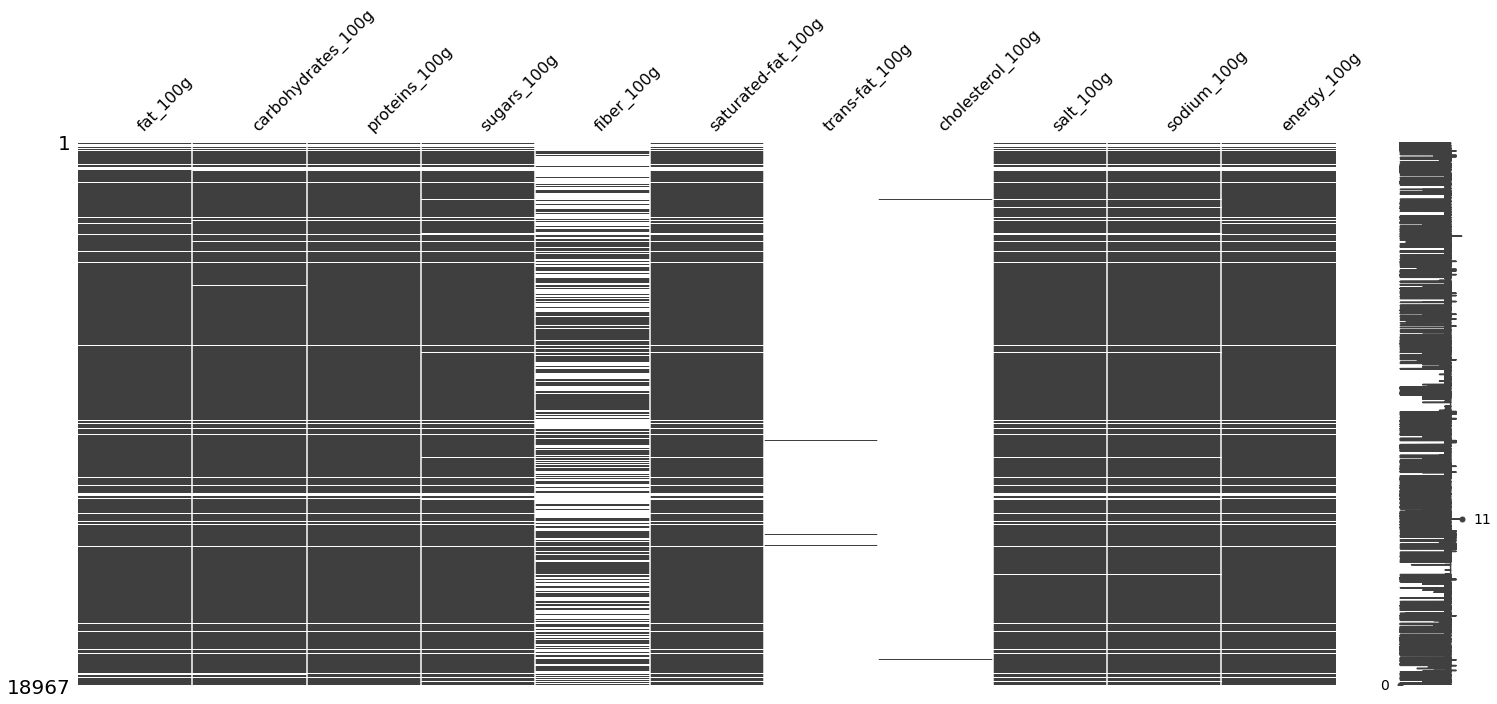

In [77]:
msno.matrix(df[['fat_100g','carbohydrates_100g','proteins_100g','sugars_100g','fiber_100g','saturated-fat_100g','trans-fat_100g','cholesterol_100g','salt_100g','sodium_100g','energy_100g']])

In [78]:
df[['fat_100g','carbohydrates_100g','proteins_100g','sugars_100g','fiber_100g','saturated-fat_100g','trans-fat_100g','cholesterol_100g','salt_100g','sodium_100g','energy_100g']].describe()

,fat_100g,carbohydrates_100g,proteins_100g,sugars_100g,fiber_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,salt_100g,sodium_100g,energy_100g
count,17687.000000,17576.000000,17605.000000,17404.000000,9407.000000,17424.000000,66.000000,37.000000,17402.000000,17402.000000,17627.000000
mean,13.965768,15.209460,10.692612,6.930804,1.903727,6.218633,0.310000,0.023994,1.187894,0.477985,964.056274
std,15.311211,20.338854,8.299674,12.810573,3.114789,8.481537,0.953918,0.042002,2.234295,0.969316,642.707214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,3.900000,0.500000,0.000000,0.900000,0.032500,0.000000,0.170000,0.068000,473.000000
50%,8.900000,6.000000,8.200000,1.800000,1.100000,2.700000,0.100000,0.000000,0.900000,0.360000,830.000000
75%,21.000000,19.100000,17.000000,5.800000,2.400000,8.700000,0.200000,0.046000,1.600000,0.640000,1339.000000
max,100.000000,100.000000,73.000000,100.000000,85.000000,100.000000,7.600000,0.167500,100.000000,49.987202,6025.000000


In [79]:
df[['fat_100g','carbohydrates_100g','proteins_100g','saturated-fat_100g']].describe()

,fat_100g,carbohydrates_100g,proteins_100g,saturated-fat_100g
count,17687.000000,17576.000000,17605.000000,17424.000000
mean,13.965768,15.209460,10.692612,6.218633
std,15.311211,20.338854,8.299674,8.481537
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,3.900000,0.900000
50%,8.900000,6.000000,8.200000,2.700000
75%,21.000000,19.100000,17.000000,8.700000
max,100.000000,100.000000,73.000000,100.000000


Il n'est pas possible qu'un produit contienne plus de 100g de protéines pour 100g de produit. Les compléments protéiques ne contenant pas plus de 87g de protéines pour 100g.

In [80]:
X = df.dropna(subset=['fat_100g','carbohydrates_100g','proteins_100g','sugars_100g','fiber_100g','saturated-fat_100g','salt_100g','sodium_100g','energy_100g'])[['fat_100g','carbohydrates_100g','proteins_100g','sugars_100g','fiber_100g','saturated-fat_100g','salt_100g','sodium_100g']] #Variable explicative 
y = df.dropna(subset=['fat_100g','carbohydrates_100g','proteins_100g','sugars_100g','fiber_100g','saturated-fat_100g','salt_100g','sodium_100g','energy_100g'])['energy_100g'] #Variable expliquée
X2 = sm.add_constant(X)
lReg = sm.OLS(y,X2).fit()
print(lReg.summary())

                            OLS Regression Results                            
Dep. Variable:            energy_100g   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 6.079e+04
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:35:56   Log-Likelihood:                -54957.
No. Observations:                9311   AIC:                         1.099e+05
Df Residuals:                    9302   BIC:                         1.100e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.5805      1

Dans le cas de *p-value* > 0.05, la variable régressive n'est pas statistiquement significative et l'hypothèse nulle doit être acceptée. Cet indicateur est utilisé pour identifier les termes à conserver dans le modèle et ceux à supprimer.

Le R-squared ~ 1 implique une forte corrélation linéaire.

On supprime : *salt_100g*, *sodium_100g*

In [81]:
X = df.dropna(subset=['fat_100g','carbohydrates_100g','proteins_100g','sugars_100g','fiber_100g','saturated-fat_100g','energy_100g'])[['fat_100g','carbohydrates_100g','proteins_100g','sugars_100g','fiber_100g','saturated-fat_100g']] #Variable explicative 
y = df.dropna(subset=['fat_100g','carbohydrates_100g','proteins_100g','sugars_100g','fiber_100g','saturated-fat_100g','energy_100g'])['energy_100g'] #Variable expliquée
X2 = sm.add_constant(X)
lReg = sm.OLS(y,X2).fit()
print(lReg.summary())

                            OLS Regression Results                            
Dep. Variable:            energy_100g   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 8.196e+04
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:35:56   Log-Likelihood:                -55094.
No. Observations:                9336   AIC:                         1.102e+05
Df Residuals:                    9329   BIC:                         1.103e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.2362      1

In [82]:
df[['fat_100g','carbohydrates_100g','proteins_100g','sugars_100g','fiber_100g','saturated-fat_100g','energy_100g']].info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18967 entries, 346 to 1480666
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fat_100g            17687 non-null  float32
 1   carbohydrates_100g  17576 non-null  float32
 2   proteins_100g       17605 non-null  float32
 3   sugars_100g         17404 non-null  float32
 4   fiber_100g          9407 non-null   float32
 5   saturated-fat_100g  17424 non-null  float32
 6   energy_100g         17627 non-null  float32
dtypes: float32(7)
memory usage: 1.3 MB


In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
cols = ['fat_100g','carbohydrates_100g','proteins_100g','sugars_100g','fiber_100g','saturated-fat_100g']
df_train = data[cols].dropna(subset=cols)

for col in cols:
    X_list = [x for x in cols if x != col]
    y = df_train[col]
    X = df_train[X_list]
    
    lReg = LinearRegression(fit_intercept=True).fit(X, y)
    score = lReg.score(X, y)
    print('score',[col],':',score)
    intercept = lReg.intercept_
    coef = {}
    
    for i, x in enumerate(X_list):
        coef[x] = lReg.coef_[i]
    
    predict_index = data[(data[col].isna()) & eval(" & ".join(["(df['{0}'] >= 0)".format(x) for x in X_list]))].index
    save_index = df[df.index.isin(predict_index)].index
    
    y_predicted = lReg.predict(data[data.index.isin(save_index)][X_list])
    df.loc[save_index, col] = y_predicted
    
del df_train

score ['fat_100g'] : 1.1198934227740764e-06
score ['carbohydrates_100g'] : 2.582182890620288e-06
score ['proteins_100g'] : 6.134822971848308e-08
score ['sugars_100g'] : 8.923748273659271e-08
score ['fiber_100g'] : 7.488308495506857e-08
score ['saturated-fat_100g'] : 4.740731660901609e-06


<AxesSubplot:>

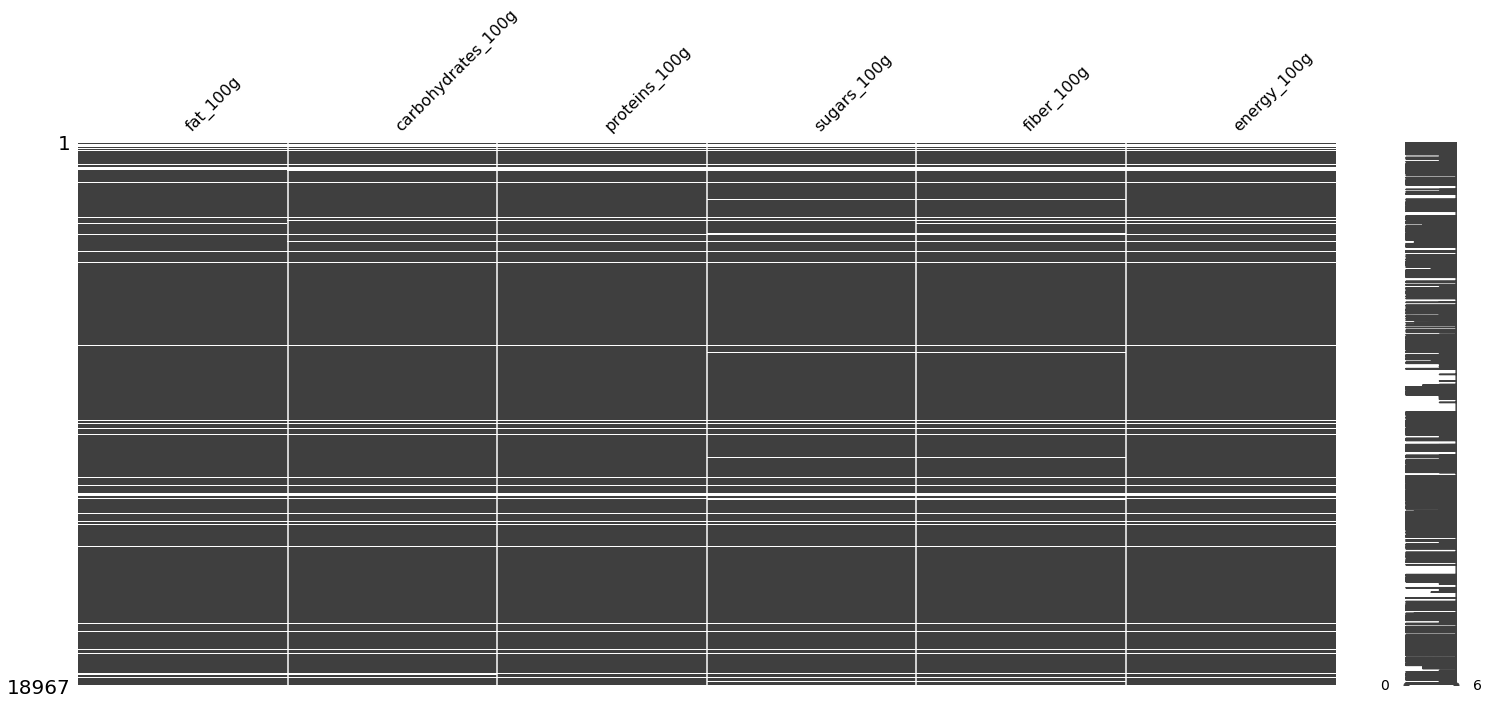

In [85]:
msno.matrix(df[['fat_100g','carbohydrates_100g','proteins_100g','sugars_100g','fiber_100g','energy_100g']])

In [86]:
df[['fat_100g','carbohydrates_100g','proteins_100g','sugars_100g','fiber_100g','energy_100g']].info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18967 entries, 346 to 1480666
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fat_100g            17690 non-null  float32
 1   carbohydrates_100g  17592 non-null  float32
 2   proteins_100g       17613 non-null  float32
 3   sugars_100g         17416 non-null  float32
 4   fiber_100g          17398 non-null  float32
 5   energy_100g         17627 non-null  float32
dtypes: float32(6)
memory usage: 1.2 MB


#### Nutriscore

Le nutriscore respecte les valeurs maximum et minimum de -15 et 40.

https://quoidansmonassiette.fr/wp-content/uploads/2018/05/Infographie-calcul-nutriscore-logo-nutritionnel-score-corrig%C3%A9-scaled.jpg

Selon l’agence nationale de santé publique, le nutriscore est calculé avec:

>Valeur énergétique (KJ/100g ou 100ml) <br>
Matières graisses (g/100g ou 100ml) <br>
Acides gras saturés (g/100g ou 100ml) <br>
Sucres (g/100g ou 100ml) <br>
Protéines (g/100g ou 100ml) <br>
Sel (g/100g ou 100ml) <br>
Fibres (AOAC) (g) <br>
Fruits, légumes, légumineuses, fruits à coque, huiles de colza, de noix et d'olive (%/100g ou 100ml) <br>
Sodium (mg/100g ou 100ml) <br>

https://www.santepubliquefrance.fr/determinants-de-sante/nutrition-et-activite-physique/articles/nutri-score

In [87]:
df[['nutriscore_score','nutrition-score-fr_100g']].describe()

,nutriscore_score,nutrition-score-fr_100g
count,16934.000000,16934.000000
mean,8.261131,8.261131
std,8.440767,8.440767
min,-14.000000,-14.000000
25%,1.000000,1.000000
50%,6.000000,6.000000
75%,15.000000,15.000000
max,29.000000,29.000000


In [88]:
df = df.drop(['nutrition-score-fr_100g'],axis=1)

In [89]:
print(df.select_dtypes(include=['int64','float32']).columns.tolist())

['serving_quantity', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score', 'nova_group', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g']


<AxesSubplot:>

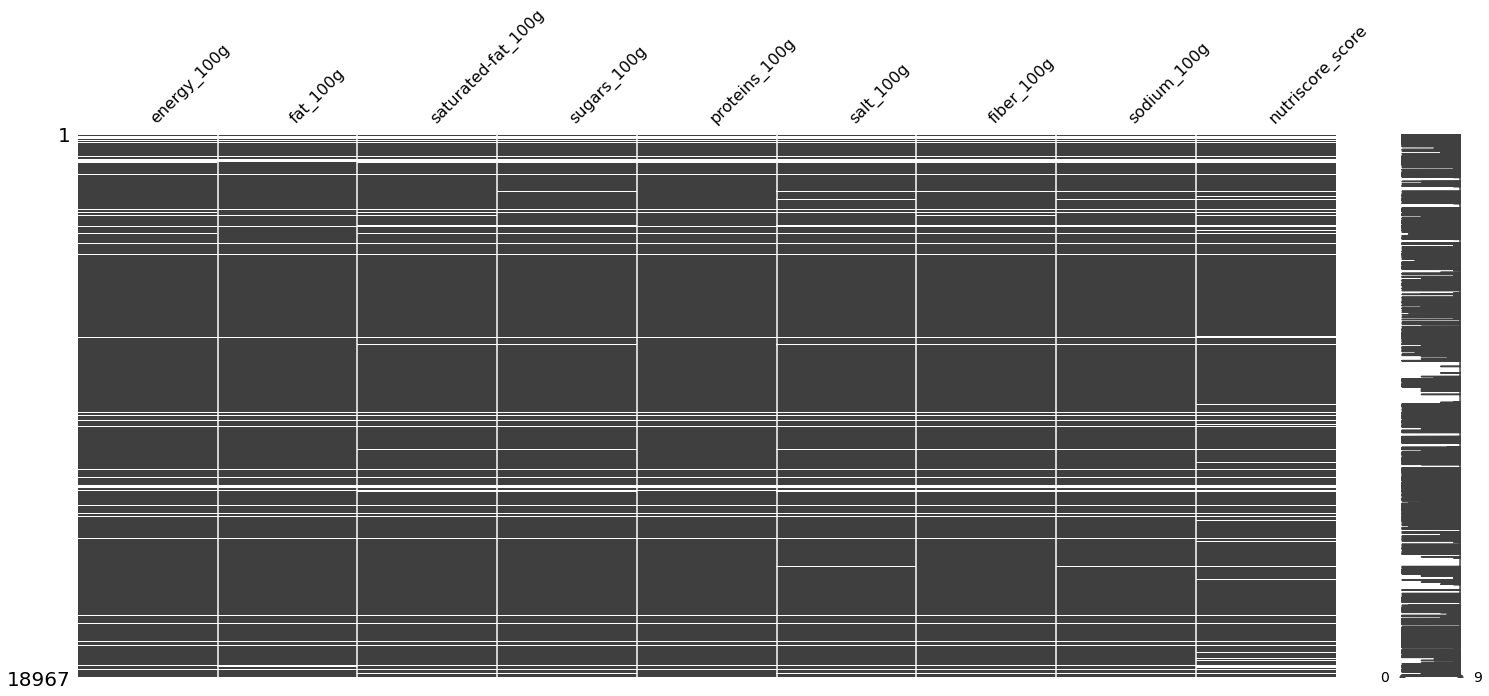

In [90]:
msno.matrix(df[['energy_100g','fat_100g','saturated-fat_100g','sugars_100g','proteins_100g',
                'salt_100g','fiber_100g', 'sodium_100g', 'nutriscore_score']])                

In [91]:
df[['energy_100g','fat_100g','saturated-fat_100g','sugars_100g','proteins_100g',
                'salt_100g','fiber_100g', 'sodium_100g', 'nutriscore_score']].describe()

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,fiber_100g,sodium_100g,nutriscore_score
count,17627.000000,17690.000000,1.742800e+04,17416.000000,17613.000000,17402.000000,17398.000000,17402.000000,16934.000000
mean,964.056274,13.965562,2.237656e+04,6.935928,10.691366,1.187894,2.380181,0.477985,8.261131
std,642.707214,15.309968,5.227240e+06,12.807797,8.298005,2.234295,2.347760,0.969316,8.440767
min,0.000000,0.000000,-1.893546e+08,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
25%,473.000000,3.000000,9.000000e-01,0.500000,3.900000,0.170000,1.000000,0.068000,1.000000
50%,830.000000,8.900000,2.700000e+00,1.800000,8.200000,0.900000,2.940670,0.360000,6.000000
75%,1339.000000,21.000000,8.700000e+00,5.900000,17.000000,1.600000,2.940670,0.640000,15.000000
max,6025.000000,100.000000,6.559652e+08,100.000000,73.000000,100.000000,85.000000,49.987202,29.000000


In [92]:
def neg_to_pos(df,cols):
    for col in cols:
        df[col] = df[col].abs()
        df[col] = np.where(df[col] < 0.01, 0, df[col])
    return df

In [93]:
df= neg_to_pos(df,['saturated-fat_100g'])
df[['energy_100g','fat_100g','saturated-fat_100g','sugars_100g','proteins_100g',
                'salt_100g','fiber_100g', 'sodium_100g', 'nutriscore_score']].describe()

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,fiber_100g,sodium_100g,nutriscore_score
count,17627.000000,17690.000000,1.742800e+04,17416.000000,17613.000000,17402.000000,17398.000000,17402.000000,16934.000000
mean,964.056274,13.965562,5.534821e+04,6.935928,10.691366,1.187894,2.380181,0.477985,8.261131
std,642.707214,15.309968,5.227070e+06,12.807797,8.298005,2.234295,2.347760,0.969316,8.440767
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
25%,473.000000,3.000000,9.000000e-01,0.500000,3.900000,0.170000,1.000000,0.068000,1.000000
50%,830.000000,8.900000,2.700000e+00,1.800000,8.200000,0.900000,2.940670,0.360000,6.000000
75%,1339.000000,21.000000,8.700000e+00,5.900000,17.000000,1.600000,2.940670,0.640000,15.000000
max,6025.000000,100.000000,6.559652e+08,100.000000,73.000000,100.000000,85.000000,49.987202,29.000000


In [94]:
X = df.dropna(subset=['energy_100g','fat_100g','saturated-fat_100g','sugars_100g',
                      'proteins_100g','salt_100g','fiber_100g','sodium_100g',
                      'nutriscore_score'])[['energy_100g', 'fat_100g', 'saturated-fat_100g',
                                            'sugars_100g','proteins_100g','salt_100g',
                                            'fiber_100g','sodium_100g']]
y = df.dropna(subset=['energy_100g','fat_100g','saturated-fat_100g','sugars_100g',
                      'proteins_100g','salt_100g','fiber_100g','sodium_100g',
                      'nutriscore_score'])['nutriscore_score']
X2 = sm.add_constant(X)
lReg = sm.OLS(y,X2).fit()
print(lReg.summary())

                            OLS Regression Results                            
Dep. Variable:       nutriscore_score   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     4528.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:35:59   Log-Likelihood:                -50434.
No. Observations:               16926   AIC:                         1.009e+05
Df Residuals:                   16917   BIC:                         1.010e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4505      0

In [95]:
X = df.dropna(subset=['energy_100g','fat_100g','saturated-fat_100g','sugars_100g',
                      'proteins_100g','salt_100g','fiber_100g',
                      'nutriscore_score'])[['energy_100g','fat_100g','saturated-fat_100g',
                                            'sugars_100g','proteins_100g','salt_100g',
                                            'fiber_100g']]
y = df.dropna(subset=['energy_100g','fat_100g','saturated-fat_100g','sugars_100g',
                      'proteins_100g','salt_100g','fiber_100g','nutriscore_score'])['nutriscore_score']
X2 = sm.add_constant(X)
lReg = sm.OLS(y,X2).fit()
print(lReg.summary())

                            OLS Regression Results                            
Dep. Variable:       nutriscore_score   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     5173.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:35:59   Log-Likelihood:                -50436.
No. Observations:               16926   AIC:                         1.009e+05
Df Residuals:                   16918   BIC:                         1.010e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4483      0

Les colonnes sont déjà assez complètes et il existe une corrélation linéaire (*R-squared* ~ 0.7)

In [96]:
df[['energy_100g','fat_100g','saturated-fat_100g','sugars_100g','proteins_100g','salt_100g',
    'fiber_100g','nutriscore_score']].info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18967 entries, 346 to 1480666
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy_100g         17627 non-null  float32
 1   fat_100g            17690 non-null  float32
 2   saturated-fat_100g  17428 non-null  float32
 3   sugars_100g         17416 non-null  float32
 4   proteins_100g       17613 non-null  float32
 5   salt_100g           17402 non-null  float32
 6   fiber_100g          17398 non-null  float32
 7   nutriscore_score    16934 non-null  float32
dtypes: float32(8)
memory usage: 1.3 MB


<AxesSubplot:>

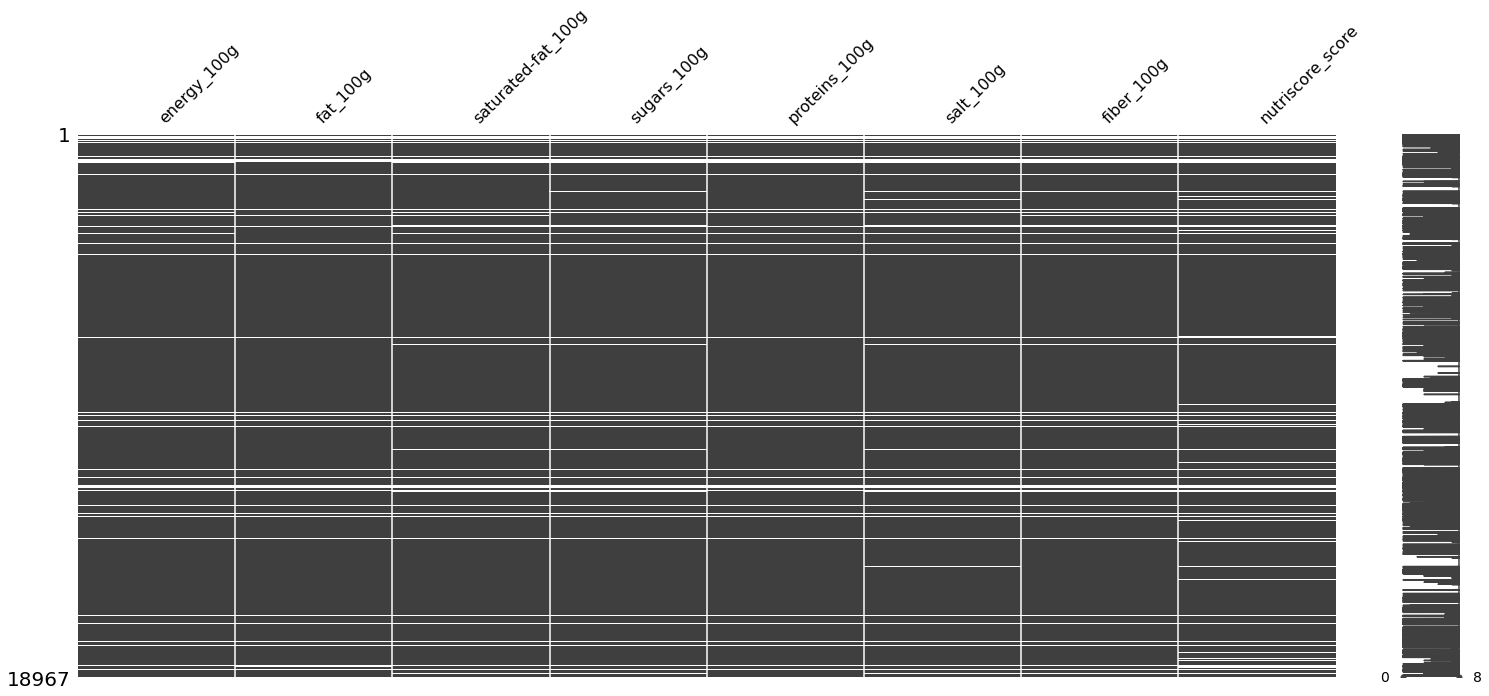

In [97]:
msno.matrix(df[['energy_100g','fat_100g','saturated-fat_100g','sugars_100g','proteins_100g',
                'salt_100g','fiber_100g','nutriscore_score']])

#### Quantity

Unification des valeurs et des unités

In [98]:
df['quantity'].describe()

count     18967
unique     3525
top       200 g
freq       1090
Name: quantity, dtype: object

In [99]:
print(df['quantity'].sample(15))

620098                     120 kg
608965                      400 g
1343819                     110 g
689164                      33 cl
607308                      150 g
660496                      450 g
661242                    400 g e
532312                      350 g
790952                       50 g
713649                   0,250 kg
565419     720 g [2 x (6 x 60 g)]
639907                      50 cl
669787                      560 g
754915                      300 g
1244637                     120 g
Name: quantity, dtype: object


In [100]:
#https://docs.python.org/3/library/re.html
#https://pythex.org/

import re
def unit_val_unification(df,maxVal):
    strings = re.compile("(\d)*(\.|,)?(\d)+(\s)*[kKcCmM]?[gGlL]")
    filteredQ = df.quantity.astype('str').apply(lambda s: strings.search(s).group(0) if strings.search(s) else None)
    numStrings = re.compile("(\d)*(\.|,)?(\d)+")
    numFiltered = [float(numStrings.search(s).group(0).replace(',','.')) if s else None for s in filteredQ]
    unitStrings = re.compile("[kKcCmM]?[gGlL]")
    unitFiltered = [unitStrings.search(s).group(0).lower() if s else None for s in filteredQ]

    cleanVals = []
    cleanUnits = []

    for val, unit in zip(numFiltered, unitFiltered):
        if unit == 'kg':
            cleanUnits.append('g')
            cleanVals.append(val*1000)
        elif unit == 'g':
            cleanUnits.append('g')
            cleanVals.append(val)
        elif unit == 'mg':
            cleanUnits.append('g')
            cleanVals.append(val/1000)
        elif unit == 'l':
            cleanUnits.append('ml')
            cleanVals.append(val*1000)
        elif unit == 'cl':
            cleanUnits.append('ml')
            cleanVals.append(val*10)
        elif unit == 'ml':
            cleanUnits.append('ml')
            cleanVals.append(val)
        else :
            cleanUnits.append(None)
            cleanVals.append(None)

    cleanVals = [x if isinstance(x,float) and (x <= maxVal) else np.NaN for x in cleanVals]
    
    return cleanVals, cleanUnits

In [101]:
df['quantity_value'],df['quantity_unit'] = unit_val_unification(df,3000) #3kg/3L comme valeur maximum possible

<AxesSubplot:xlabel='quantity_value', ylabel='Density'>

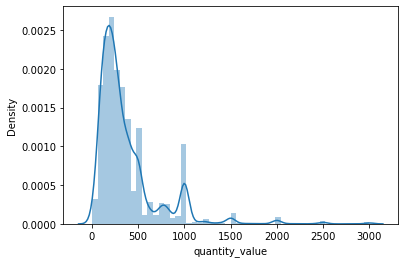

In [102]:
sns.distplot(df['quantity_value'].dropna())

#### Ingredients

Extraction des ingrédients et création d'une nouvelle liste avec "," comme séparateur

In [103]:
memeTags(df,['ingredients_text'])
print('Count:',df['ingredients_text'].describe()[0])
print('Uniques:',df['ingredients_text'].describe()[1])
print('Dataframe:',df.shape)

,ingredients_text
739705,"gras de porc*, foie de porc 25%*, eau, couenne de porc*, farine de blé, farine de riz, oignon, sel, dextrose de maïs, épices et plantes aromatiques, antioxydant : acide ascorbique ; conservateur : nitrite de sodium. Traces éventuelles d'oeufs, lait, moutarde et noisette et pistache. *Origine: France"
562227,"_Lait_ (origine France) fermenté 85,9 %, mangue 6,0 %, sucre 5,9 %, fécule de manioc, épaississant : pectine, arômes naturels, vitamine D."
790740,"Farine de _blé_* 34% , purée de tomates* 25.3%, eau, _fromage_ de chèvre* 11.1 % , _emmental_* 11.1%, huile de tournesol*, levure, sel, ail*, oignon*, origan*, herbes de provence*, poivre*, piment*. *Bio."
528999,"Filets de thon, huile d'olive vierge extra 28%, sel"
818305,"Lait entier pasteurisé de bufflonne, sel, présure. Élaboré à partir de lait de bufflonne d'origine Italie, collecté dans la zone d'appellation. Produit conservé en saumure."


Count: 18967
Uniques: 17832
Dataframe: (18967, 64)


In [104]:
#https://docs.python.org/3/library/unicodedata.html

import unicodedata

notString = re.compile('[^a-zA-Z,; ]+')
decString = re.compile(r'(?<=\d)[,|;](?=\d)')

def removeBrackets(string):
    counter = [0] * (len("()[]") // 2)
    tempChars = []
    for chars in string:
        for i, j in enumerate("()[]"):
            if chars == j:
                kind, closed = divmod(i,2)
                counter[kind] += (-1)**closed #1: open -1: close
                if counter[kind] < 0:
                    counter[kind] = 0
                else:
                    break
        else:
            if not any(counter):
                tempChars.append(chars)
    return ''.join(tempChars)

def removeAccents(string):
    string = unicodedata.normalize('NFD',string)
    string = string.encode('ascii','ignore')
    string = string.decode('utf-8')
    return str(string)

def lowerCase(string):
    return string.lower()

def commaToPoint(string):
    return decString.sub(".",string)

def cleanString(string):
    return notString.sub("",string)

def slipters(string):
    return re.findall(r"[^,|;]+",string)

def spaceTrim(string):
    return string.strip(" ")

def listOfIngredients(string):
    string = removeBrackets(string)
    string = removeAccents(string)
    string = lowerCase(string)
    string = commaToPoint(string)
    string = cleanString(string)
    ingredientsList = slipters(string)
    return [spaceTrim(ingredient) for ingredient in ingredientsList if spaceTrim(ingredient) != ""] 

In [105]:
df['ingredients_list'] = df['ingredients_text'].apply(listOfIngredients)
df['ingredients_list'] = df['ingredients_list'].apply(lambda i: i if isinstance(i,list) else[]) #Returns True if the specified object is of the specified type, otherwise False
df['ingredients_q'] = df['ingredients_list'].apply(len)
df['ingredients'] = df['ingredients_list'].apply(lambda l: ",".join(l))

In [106]:
memeTags(df,['ingredients_list','ingredients_q','ingredients'])

,ingredients_list,ingredients_q,ingredients
672225,[melange de miels originaires et non originaires de lue],1,melange de miels originaires et non originaires de lue
738614,"[sucre, sirop de glucose, sucre inverti, amidon, gomme arabique, aromes naturels de menthe, proteines de lait, agent denrobage cire de carnauba]",8,"sucre,sirop de glucose,sucre inverti,amidon,gomme arabique,aromes naturels de menthe,proteines de lait,agent denrobage cire de carnauba"
625292,"[riz precuit huile, thon, huile de colza, poivrons rouges, carottes, mais, petits pois, eau, tomates, oignons, cornichons, vinaigre dalcool, olives noires, sel, epaissisant, poivre, arome naturel]",17,"riz precuit huile,thon,huile de colza,poivrons rouges,carottes,mais,petits pois,eau,tomates,oignons,cornichons,vinaigre dalcool,olives noires,sel,epaissisant,poivre,arome naturel"
1185990,"[eau, sirop de sucre inverti, creme fraiche, farine de ble, sucre, lait ecreme, matiere grasse vegetale, sirop de glucose, cacao maigre, lactose et proteines de lait, cacao, amidon de ble, matiere grasse de lait, dextrose, noisettes, emulsifiants, beurre de cacao, colorants, sel, stabilisants, pate de cacao, poudre de lait ecreme, amidon modifie, aromes naturels, poudre a lever, arome naturel de vanille]",26,"eau,sirop de sucre inverti,creme fraiche,farine de ble,sucre,lait ecreme,matiere grasse vegetale,sirop de glucose,cacao maigre,lactose et proteines de lait,cacao,amidon de ble,matiere grasse de lait,dextrose,noisettes,emulsifiants,beurre de cacao,colorants,sel,stabilisants,pate de cacao,poudre de lait ecreme,amidon modifie,aromes naturels,poudre a lever,arome naturel de vanille"
671964,"[creme legere, amidon modifie de mais, ferments lactiques]",3,"creme legere,amidon modifie de mais,ferments lactiques"


#### Labels

Bio et Organic sont, plus ou moins, la même chose.

Source : https://www.organicwelcome.com/bio-vs-organic-difference/#:~:text=The%20difference%20between%20bio%20and%20organic%20is%20on%20the%20consumer%20level.&text=Bio%20is%20perceived%20to%20be,and%20more%20respective%20of%20nature.

<AxesSubplot:>

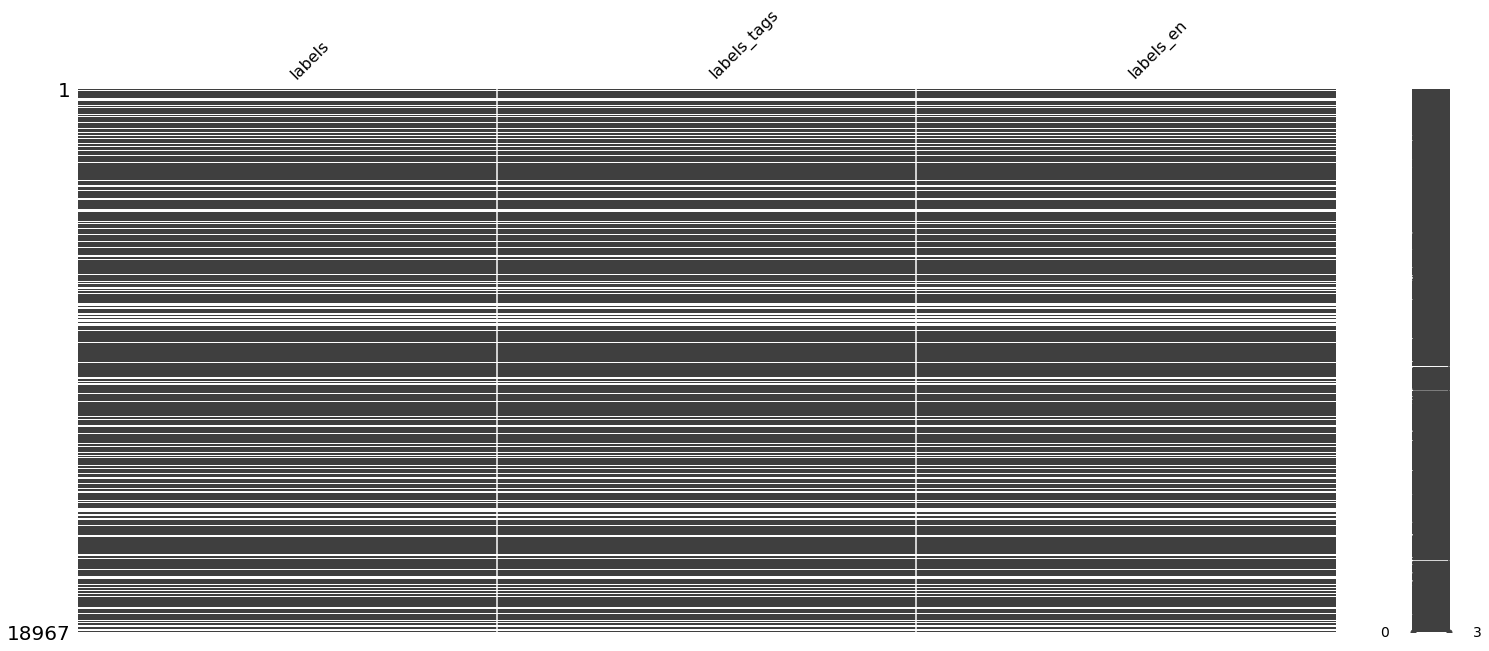

In [107]:
msno.matrix(df[['labels','labels_tags','labels_en']])

In [108]:
memeTags(df,['labels','labels_tags','labels_en'])

,labels,labels_tags,labels_en
610388,"2016 Nutrition labelling experiment, Green Dot, Nutriscore experiment, Nutriscore experiment Grade A, en:nutriscore","en:2016-nutrition-labelling-experiment,en:green-dot,en:nutriscore,en:nutriscore-experiment,en:nutriscore-experiment-grade-a","2016 Nutrition labelling experiment,Green Dot,Nutriscore,Nutriscore experiment,Nutriscore experiment Grade A"
685341,IGP,en:pgi,PGI
660367,"Bio, Bio européen, FR-BIO-01, FR-BIO-10, AB Agriculture Biologique","en:organic,en:eu-organic,en:fr-bio-01,en:fr-bio-10,fr:ab-agriculture-biologique","Organic,EU Organic,FR-BIO-01,FR-BIO-10,fr:ab-agriculture-biologique"
704772,"Point Vert, Fabriqué en France, Sans colorants, Sans conservateurs, Eco-Emballages","en:green-dot,en:made-in-france,en:no-colorings,en:no-preservatives,fr:eco-emballages","Green Dot,Made in France,No colorings,No preservatives,fr:eco-emballages"
627693,Sans huile de palme,en:palm-oil-free,Palm oil free


In [109]:
df[['labels','labels_tags']].describe()

,labels,labels_tags
count,14666,14667
unique,7502,6504
top,Point Vert,en:green-dot
freq,1097,1159


In [110]:
temp = df.copy()
temp['labels'] = temp['labels'].astype(str)
iL = [i.split(',',1)[0] for i in temp['labels'].tolist()]
iLtot = collections.Counter(iL).most_common()
df_iLtot = pd.DataFrame(iLtot,columns = ["labels","Nombre d'ocurrences"]).sort_values(by="Nombre d'ocurrences",ascending=False)
with np.printoptions(threshold=np.inf):
    print(df_iLtot)

                                                labels  Nombre d'ocurrences
0                                                  nan                 4301
1                                           Point Vert                 3663
2                                     Viande Française                 1152
3                                                  Bio                 1112
4                                              Organic                  686
5                              Labels de distributeurs                  592
6                                            Green Dot                  415
7                                   Fabriqué en France                  334
8                                          Sans gluten                  295
9                                    en:made-in-france                  251
10                        Peu ou pas de matière grasse                  190
11                                      Sans colorants                  184
12          

## Outliers

In [111]:
def overXvalue_toMean(df,cols,x=100):
    for col in cols:
        median = df.loc[df[col] < x, col].median()
        df[col] = np.where(df[col] >= x, median, df[col])
    return df

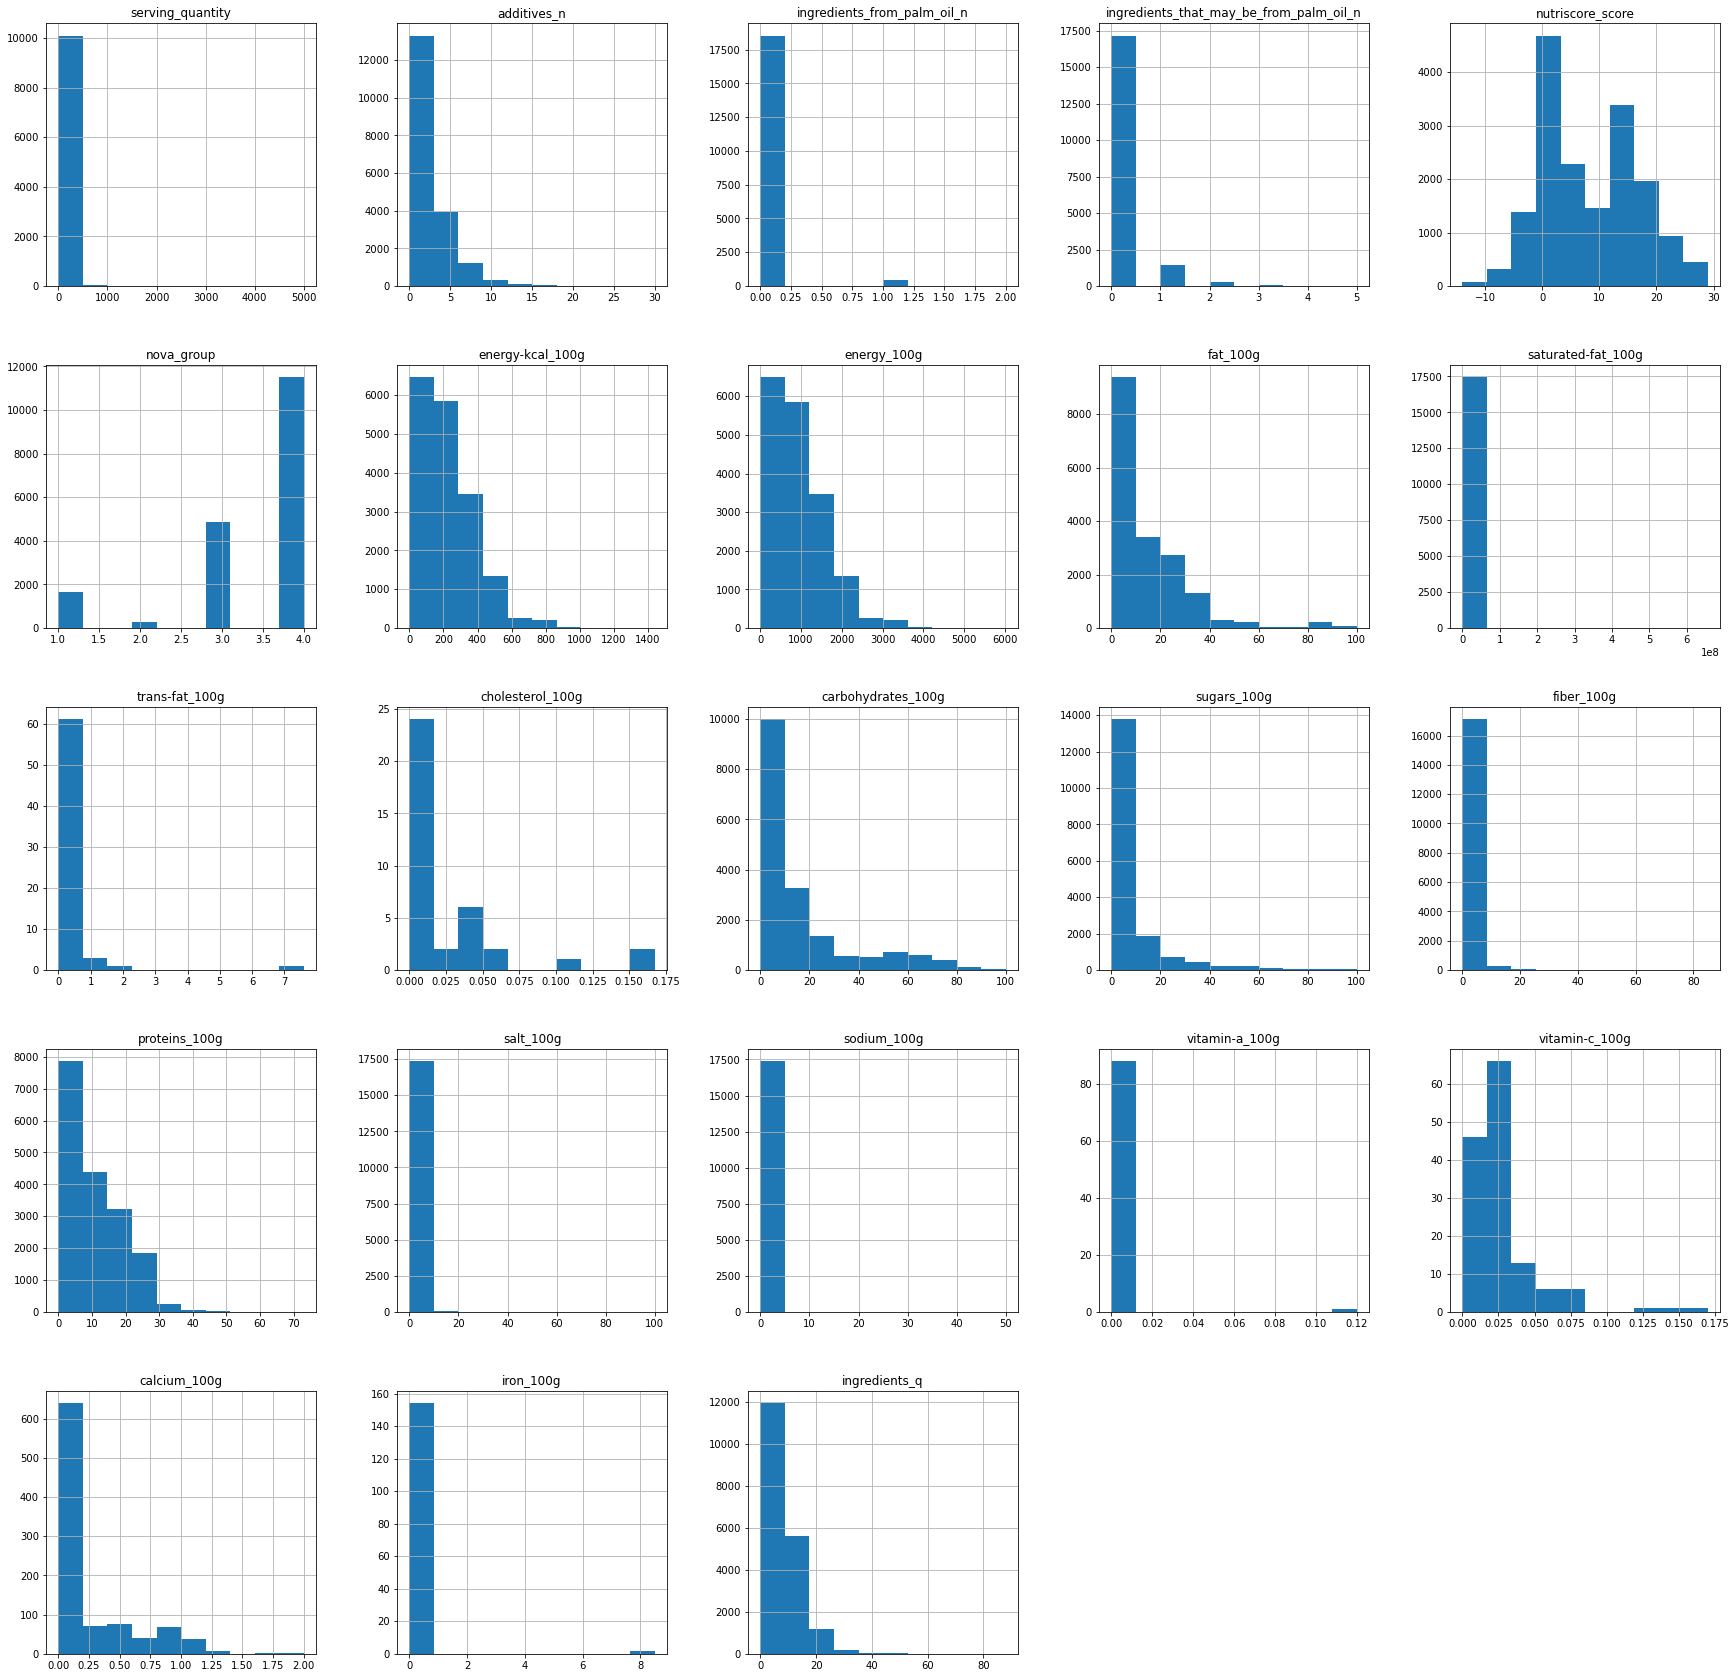

In [112]:
obj = df[df.dtypes[(df.dtypes=="float32")|(df.dtypes=="int64")].index.values].hist(figsize=[30,30])

In [113]:
df=overXvalue_toMean(df,['saturated-fat_100g'],100)

In [114]:
qOrder = df['serving_quantity'].sort_values(inplace=False,ascending=False)
eOrder = df['energy_100g'].sort_values(inplace=False,ascending=False)
print(qOrder.head(5))
print(eOrder.head(5))

653805    5000.0
758342    1500.0
435007    1500.0
435006    1500.0
435005    1500.0
Name: serving_quantity, dtype: float32
728347    6025.0
478303    3916.0
662549    3770.0
758218    3766.0
830136    3766.0
Name: energy_100g, dtype: float32


In [115]:
df=overXvalue_toMean(df,['serving_quantity','energy_100g'],4000)

Une fois l'analyse précédente des données terminée, on constate que les colonnes contiennent des informations réparties de manière raisonnable en fonction de chaque situation.

## Dernier nettoyage des colonnes avec peu d'information

<AxesSubplot:>

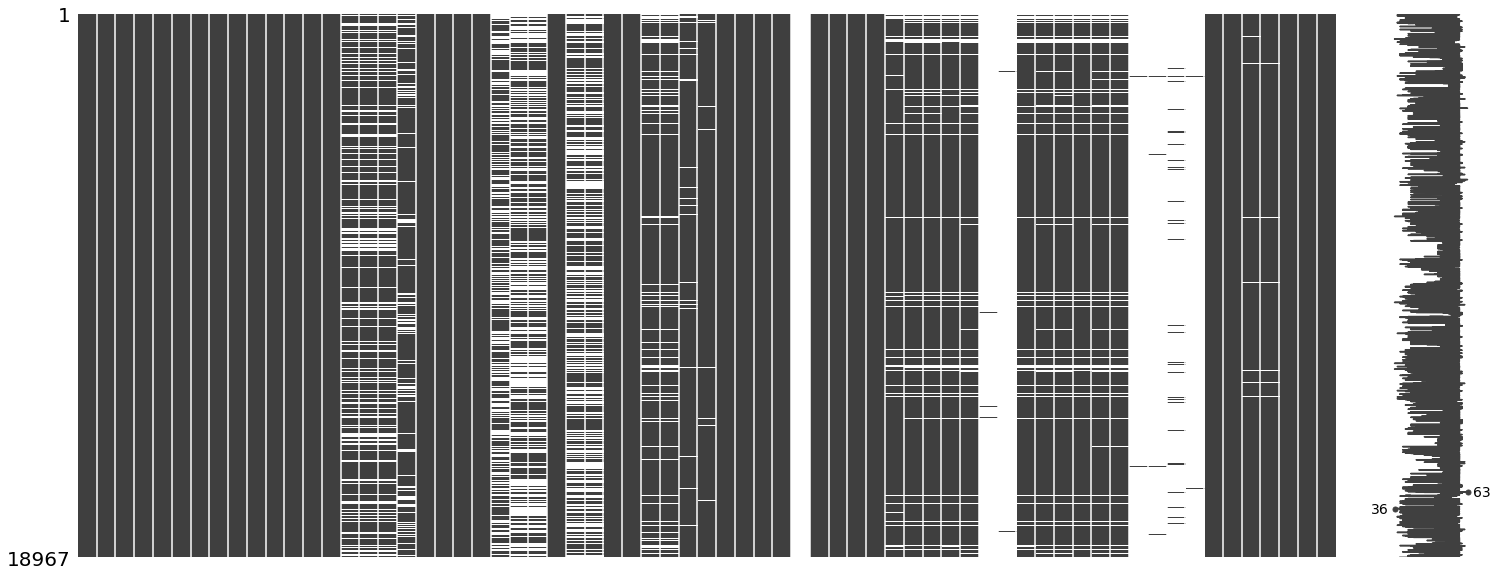

In [116]:
msno.matrix(df)

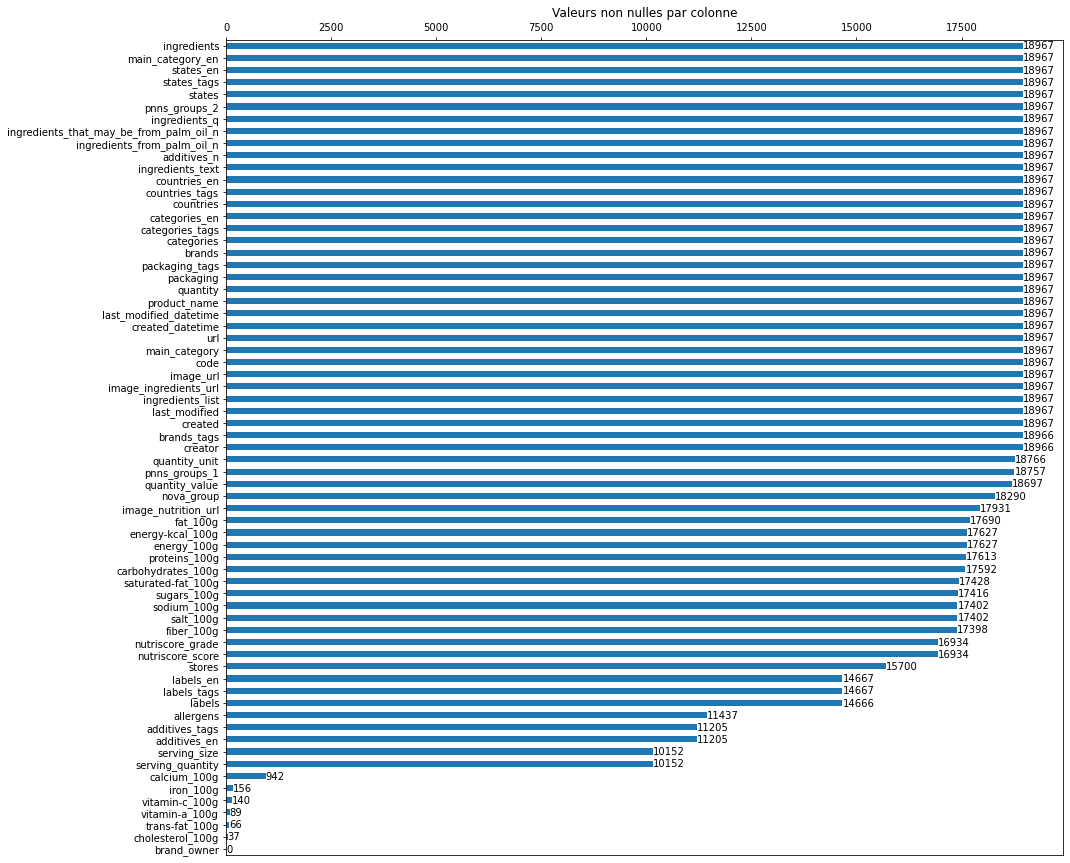

In [117]:
colsFilled = df.count()
colsFilled.sort_values(ascending=False,inplace=True)

fig, ax = plt.subplots(figsize=(15,15))
colsFilled.plot.barh(ax=ax)
plt.gca().invert_yaxis()
ax.set_title('Valeurs non nulles par colonne')
ax.xaxis.tick_top()
for i, j in enumerate(colsFilled):
    ax.text(j,i+0.25,str(j))

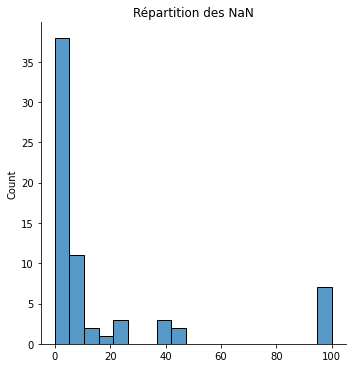

In [118]:
proportion_nan = df.isna().sum().divide(df.shape[0]/100).sort_values(ascending=False)
sns.displot(proportion_nan.values)
plt.title('Répartition des NaN')
plt.show()

In [119]:
df = delete_nan(df,0.4)

Colonnes supprimées : 7
['brand_owner', 'trans-fat_100g', 'cholesterol_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g']


## Taille final vs Taille initial

In [120]:
FvsI = pd.DataFrame({'CSV':['initial','final'],'Shape':[original.shape,df.shape],'% NaN':
                     [round(original.isna().sum().sum()/original.shape[0]/original.shape[1]*100,2),
                     round(df.isna().sum().sum()/df.shape[0]/df.shape[1]*100,2)],
                    'Memory Usage in MB':[round(original.memory_usage(index=True).sum()/(1024*1024),2),
                                          round(df.memory_usage(index=True).sum()/(1024*1024),2)]})
FvsI

,CSV,Shape,% NaN,Memory Usage in MB
0,initial,"(1481112, 182)",78.86,2056.60
1,final,"(18967, 60)",6.84,8.29


# Export

In [121]:
df.to_csv('OFF_cleaned.csv',sep='\t',encoding='utf-8',index=False)